In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=239dc253d36adaeac6e111b32c1b5a8038a3f388c9a90070fde63571c7bfa2aa
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


# **DATA CLEANING**

In [ ]:
df1 = pd.read_csv('chemotherapy_patient_data.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52321 entries, 0 to 52320
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               52321 non-null  object 
 1   Age                      52321 non-null  int64  
 2   Sex                      52321 non-null  object 
 3   BMI                      52321 non-null  float64
 4   Smoking_Status           52321 non-null  object 
 5   Cancer_Type              52321 non-null  object 
 6   Genetic_Mutation         46990 non-null  object 
 7   Tumor_Stage              52321 non-null  object 
 8   Tumor_Size               52321 non-null  float64
 9   Metastasis_Status        52321 non-null  object 
 10  Chemotherapy_Regimen     49765 non-null  object 
 11  Dosage (mg/m²)           52321 non-null  float64
 12  Cycles_Completed         52321 non-null  int64  
 13  Nausea_Severity          52321 non-null  int64  
 14  Neutropenia           

In [ ]:
df = df1.dropna(subset=['Genetic_Mutation','Chemotherapy_Regimen'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44709 entries, 0 to 52320
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               44709 non-null  object 
 1   Age                      44709 non-null  int64  
 2   Sex                      44709 non-null  object 
 3   BMI                      44709 non-null  float64
 4   Smoking_Status           44709 non-null  object 
 5   Cancer_Type              44709 non-null  object 
 6   Genetic_Mutation         44709 non-null  object 
 7   Tumor_Stage              44709 non-null  object 
 8   Tumor_Size               44709 non-null  float64
 9   Metastasis_Status        44709 non-null  object 
 10  Chemotherapy_Regimen     44709 non-null  object 
 11  Dosage (mg/m²)           44709 non-null  float64
 12  Cycles_Completed         44709 non-null  int64  
 13  Nausea_Severity          44709 non-null  int64  
 14  Neutropenia              44

# **EDA**

In [ ]:
print(df.describe())

                Age           BMI    Tumor_Size  Dosage (mg/m²)  \
count  44709.000000  44709.000000  44709.000000    44709.000000   
mean      57.059138     26.743266      5.492943      325.343011   
std       15.870703      4.759667      2.594576      158.530922   
min       30.000000     18.500000      1.000000       50.000000   
25%       43.000000     22.600000      3.200000      187.500000   
50%       57.000000     26.800000      5.500000      325.700000   
75%       71.000000     30.900000      7.700000      463.000000   
max       84.000000     35.000000     10.000000      600.000000   

       Cycles_Completed  Nausea_Severity  Overall_Survival_Months  
count      44709.000000     44709.000000             44709.000000  
mean           4.001409         2.404303                62.583797  
std            1.997767         1.285181                32.897467  
min            1.000000         1.000000                 6.000000  
25%            2.000000         1.000000                

<Figure size 1600x3500 with 0 Axes>

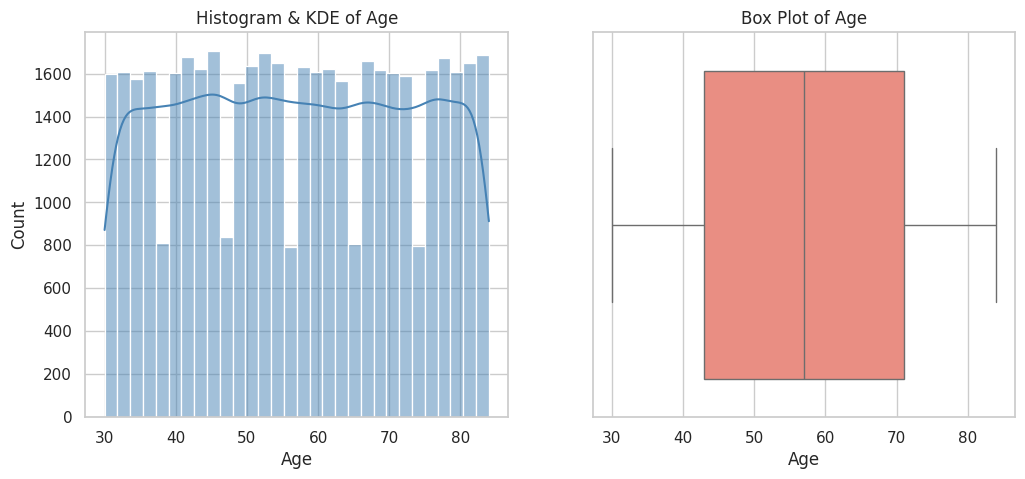

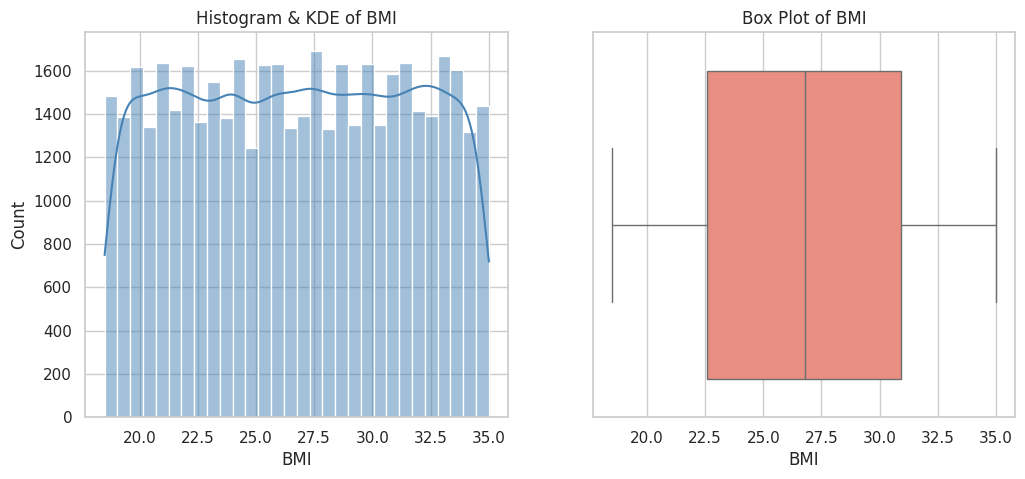

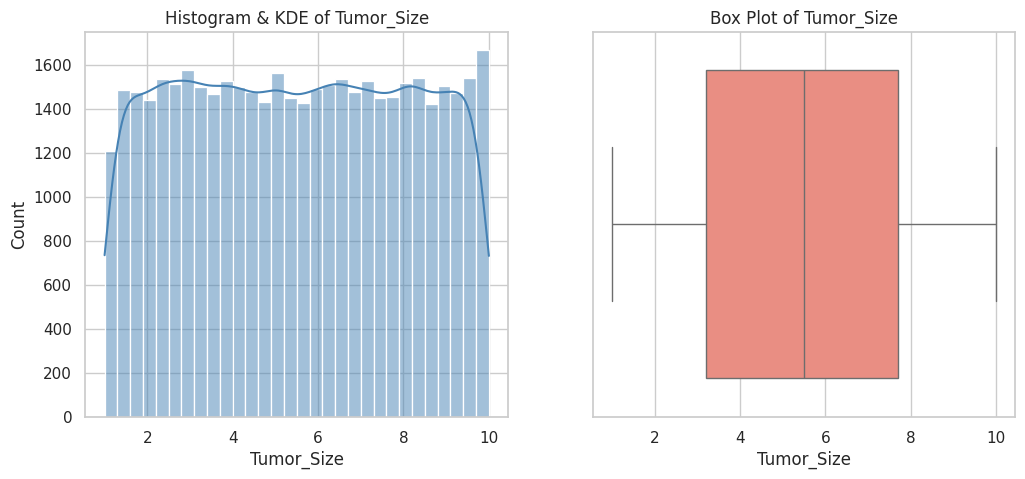

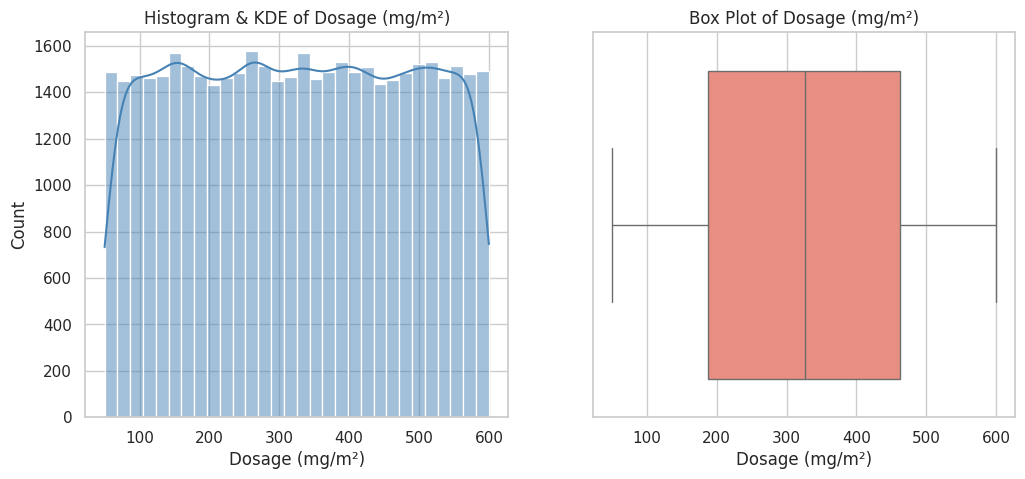

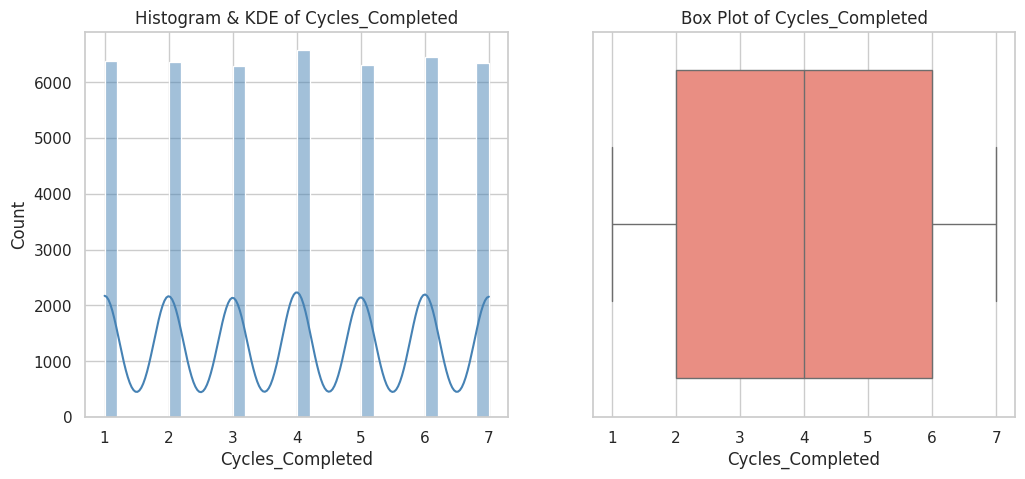

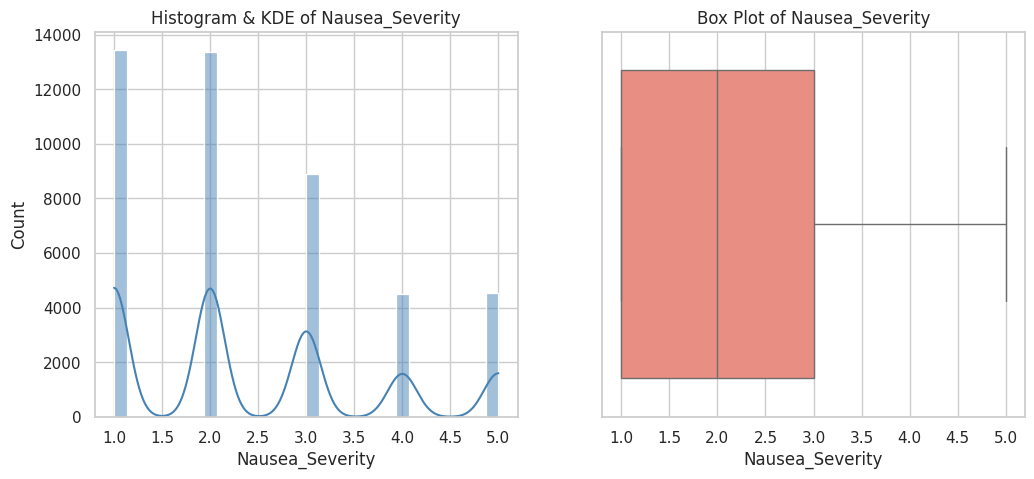

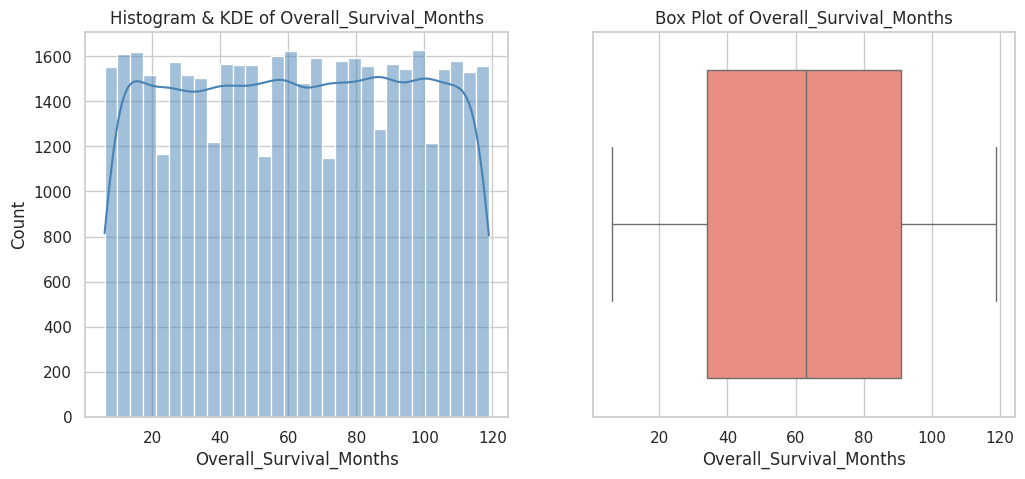

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

sns.set(style="whitegrid")
plt.figure(figsize=(16, 5 * len(numeric_cols)))

for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True, color='steelblue')
    plt.title(f'Histogram & KDE of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color="salmon")
    plt.title(f'Box Plot of {col}')

    plt.show()


<ipython-input-6-b3972429f2ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sex', y='Overall_Survival_Months', estimator=np.mean, palette='Greens')


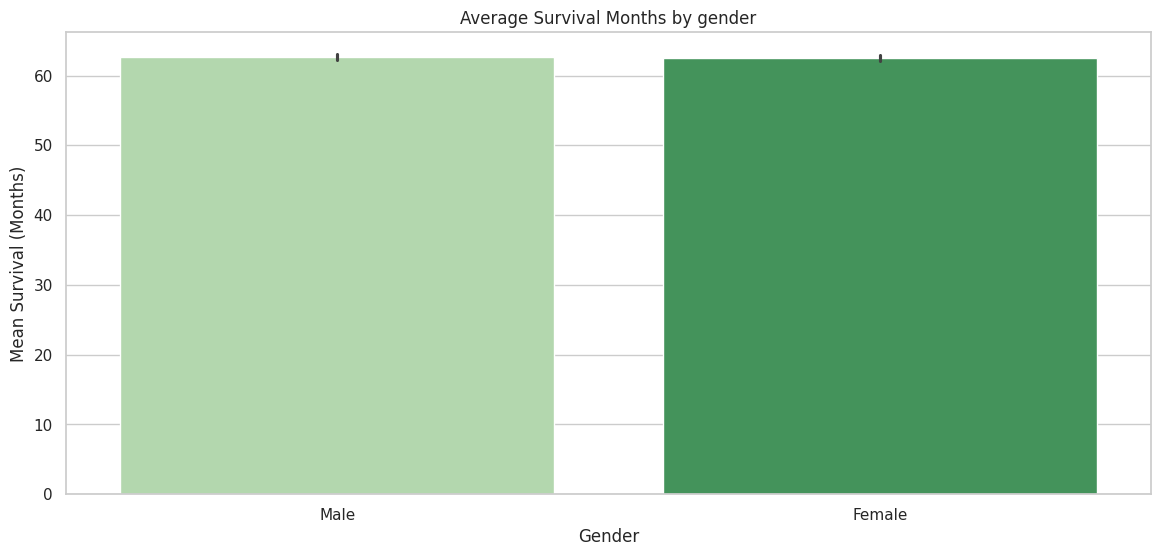

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(data=df, x='Sex', y='Overall_Survival_Months', estimator=np.mean, palette='Greens')
plt.title('Average Survival Months by gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival (Months)')
plt.show()

<ipython-input-7-d86473cd8b72>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Smoking_Status', y='Overall_Survival_Months', estimator=np.mean, palette='Blues')


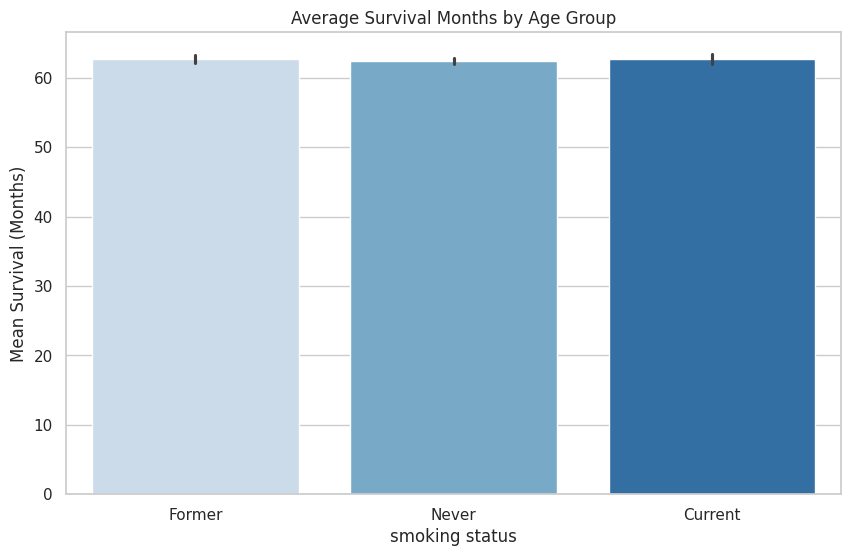

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Smoking_Status', y='Overall_Survival_Months', estimator=np.mean, palette='Blues')
plt.title('Average Survival Months by Age Group')
plt.xlabel('smoking status')
plt.ylabel('Mean Survival (Months)')
plt.show()

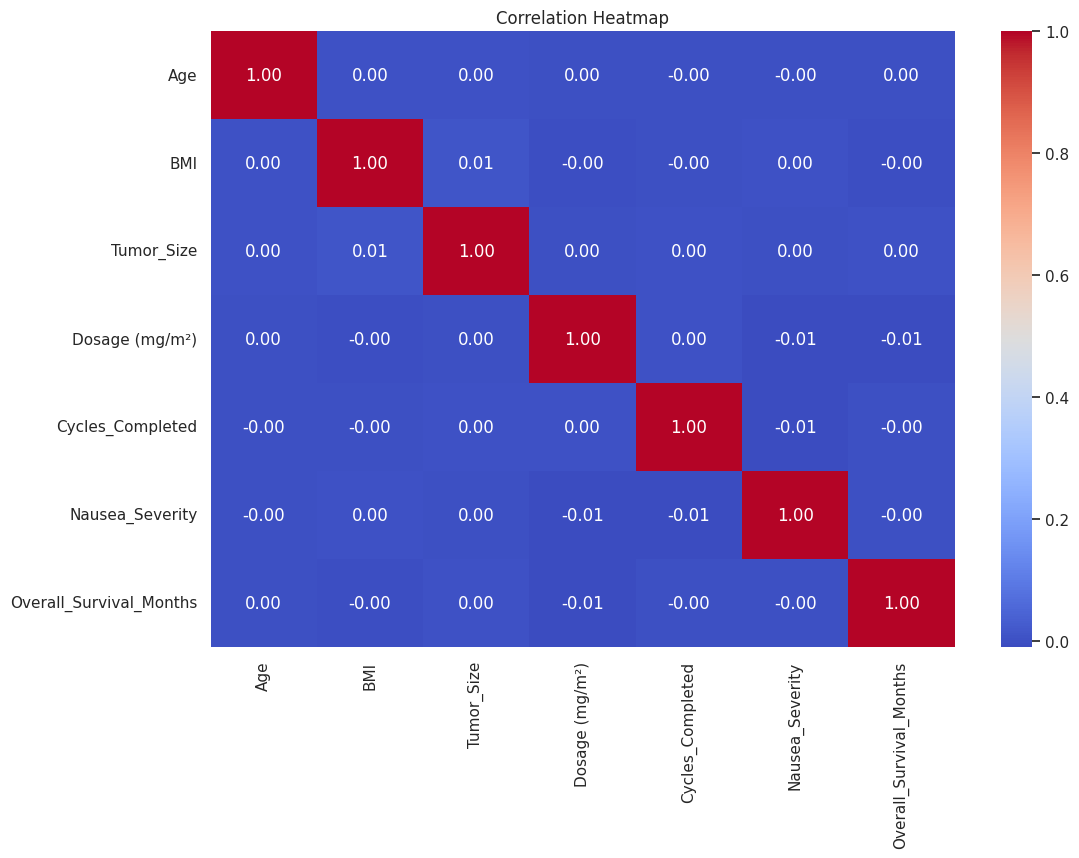

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Tumor_Stage', ylabel='Overall_Survival_Months'>

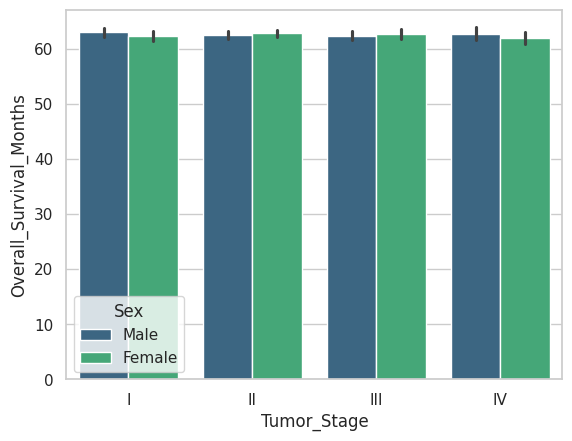

In [ ]:
stage_order = ['I', 'II', 'III', 'IV']
sns.barplot(
    data=df,
    x='Tumor_Stage',
    y='Overall_Survival_Months',
    hue='Sex',
    order=stage_order,
    palette='viridis'
)




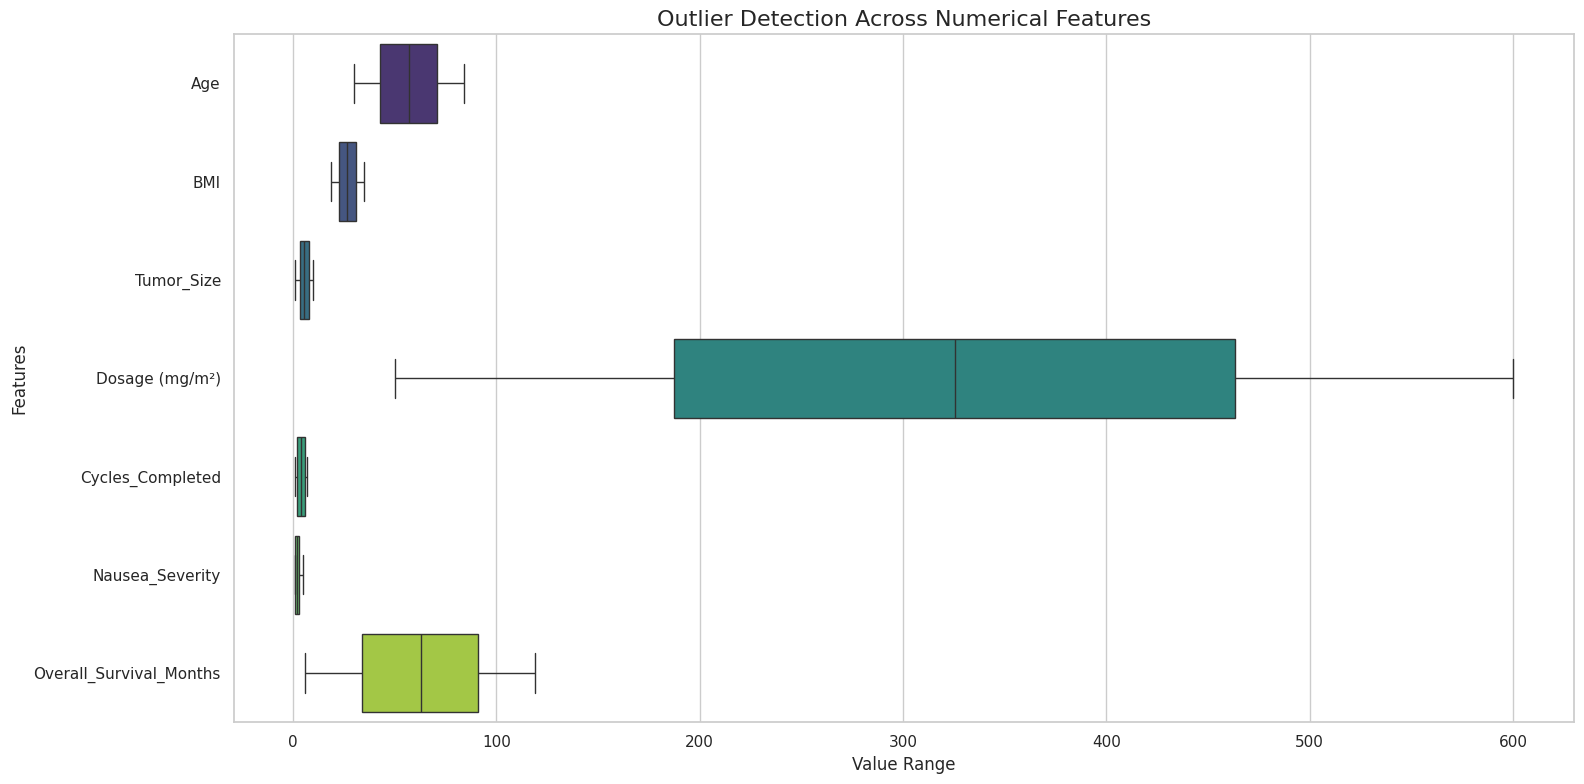

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[numerical_cols], orient='h', palette='viridis')
plt.title('Outlier Detection Across Numerical Features', fontsize=16)
plt.xlabel('Value Range')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# **DATA** **ANALYSIS**

# **Comparative analysis**

In [ ]:
df_colon= df[df['Cancer_Type'].astype(str).str.strip()=='Colon']
df_leukemia=df[df['Cancer_Type'].astype(str).str.strip()=='Leukemia']
df_lymphoma=df[df['Cancer_Type'].astype(str).str.strip()=='Lymphoma']
df_lung=df[df['Cancer_Type'].astype(str).str.strip()=='Lung']
df_Breast=df[df['Cancer_Type'].astype(str).str.strip()=='Breast']

In [ ]:
breastsurvival_rates = df_Breast.groupby(['Cancer_Type','Genetic_Mutation', 'Chemotherapy_Regimen', 'Metastasis_Status'])['Overall_Survival_Months'].mean().reset_index()
breastsurvival_rates = breastsurvival_rates.sort_values(by='Overall_Survival_Months', ascending=False)
df_breastsurvival_rates = breastsurvival_rates
print(df_breastsurvival_rates)


   Cancer_Type Genetic_Mutation Chemotherapy_Regimen Metastasis_Status  \
26      Breast             TP53                 CHOP                No   
11      Breast             EGFR                 CHOP               Yes   
8       Breast             EGFR                 ABVD                No   
17      Breast             KRAS                 ABVD               Yes   
1       Breast            BRCA1                 ABVD               Yes   
4       Breast            BRCA1               FOLFOX                No   
16      Breast             KRAS                 ABVD                No   
13      Breast             EGFR               FOLFOX               Yes   
24      Breast             TP53                 ABVD                No   
19      Breast             KRAS                 CHOP               Yes   
9       Breast             EGFR                 ABVD               Yes   
29      Breast             TP53               FOLFOX               Yes   
21      Breast             KRAS       

In [ ]:
colonsurvival_rates = df_colon.groupby(['Cancer_Type','Genetic_Mutation', 'Chemotherapy_Regimen', 'Metastasis_Status'])['Overall_Survival_Months'].mean().reset_index()
colonsurvival_rates = colonsurvival_rates.sort_values(by='Overall_Survival_Months', ascending=False)
df_colonsurvival_rates = colonsurvival_rates
print(df_colonsurvival_rates)

   Cancer_Type Genetic_Mutation Chemotherapy_Regimen Metastasis_Status  \
13       Colon             EGFR               FOLFOX               Yes   
17       Colon             KRAS                 ABVD               Yes   
31       Colon             TP53          Gemcitabine               Yes   
7        Colon            BRCA1          Gemcitabine               Yes   
25       Colon             TP53                 ABVD               Yes   
5        Colon            BRCA1               FOLFOX               Yes   
9        Colon             EGFR                 ABVD               Yes   
0        Colon            BRCA1                 ABVD                No   
10       Colon             EGFR                 CHOP                No   
19       Colon             KRAS                 CHOP               Yes   
21       Colon             KRAS               FOLFOX               Yes   
20       Colon             KRAS               FOLFOX                No   
1        Colon            BRCA1       

In [ ]:
leukemiasurvival_rates = df_leukemia.groupby(['Cancer_Type','Genetic_Mutation', 'Chemotherapy_Regimen', 'Metastasis_Status'])['Overall_Survival_Months'].mean().reset_index()
leukemiasurvival_rates = leukemiasurvival_rates.sort_values(by='Overall_Survival_Months', ascending=False)
df_leukemiasurvival_rates = leukemiasurvival_rates
print(df_leukemiasurvival_rates)

   Cancer_Type Genetic_Mutation Chemotherapy_Regimen Metastasis_Status  \
15    Leukemia             EGFR          Gemcitabine               Yes   
3     Leukemia            BRCA1                 CHOP               Yes   
10    Leukemia             EGFR                 CHOP                No   
21    Leukemia             KRAS               FOLFOX               Yes   
19    Leukemia             KRAS                 CHOP               Yes   
12    Leukemia             EGFR               FOLFOX                No   
20    Leukemia             KRAS               FOLFOX                No   
0     Leukemia            BRCA1                 ABVD                No   
8     Leukemia             EGFR                 ABVD                No   
13    Leukemia             EGFR               FOLFOX               Yes   
2     Leukemia            BRCA1                 CHOP                No   
9     Leukemia             EGFR                 ABVD               Yes   
7     Leukemia            BRCA1       

In [ ]:
lymphomasurvival_rates = df_lymphoma.groupby(['Cancer_Type','Genetic_Mutation', 'Chemotherapy_Regimen', 'Metastasis_Status',])['Overall_Survival_Months'].mean().reset_index()
lymphomasurvival_rates = lymphomasurvival_rates.sort_values(by='Overall_Survival_Months', ascending=False)
df_lymphomasurvival_rates = lymphomasurvival_rates
print(df_lymphomasurvival_rates)

   Cancer_Type Genetic_Mutation Chemotherapy_Regimen Metastasis_Status  \
29    Lymphoma             TP53               FOLFOX               Yes   
12    Lymphoma             EGFR               FOLFOX                No   
9     Lymphoma             EGFR                 ABVD               Yes   
25    Lymphoma             TP53                 ABVD               Yes   
11    Lymphoma             EGFR                 CHOP               Yes   
5     Lymphoma            BRCA1               FOLFOX               Yes   
20    Lymphoma             KRAS               FOLFOX                No   
10    Lymphoma             EGFR                 CHOP                No   
19    Lymphoma             KRAS                 CHOP               Yes   
18    Lymphoma             KRAS                 CHOP                No   
7     Lymphoma            BRCA1          Gemcitabine               Yes   
26    Lymphoma             TP53                 CHOP                No   
30    Lymphoma             TP53       

In [ ]:

lungsurvival_rates = df_lung.groupby(['Cancer_Type','Genetic_Mutation', 'Chemotherapy_Regimen', 'Metastasis_Status'])['Overall_Survival_Months'].mean().reset_index()
lungsurvival_rates = lungsurvival_rates.sort_values(by='Overall_Survival_Months', ascending=False)
df_lungsurvival_rates = lungsurvival_rates
print(df_lungsurvival_rates)

   Cancer_Type Genetic_Mutation Chemotherapy_Regimen Metastasis_Status  \
17        Lung             KRAS                 ABVD               Yes   
19        Lung             KRAS                 CHOP               Yes   
3         Lung            BRCA1                 CHOP               Yes   
31        Lung             TP53          Gemcitabine               Yes   
22        Lung             KRAS          Gemcitabine                No   
20        Lung             KRAS               FOLFOX                No   
10        Lung             EGFR                 CHOP                No   
15        Lung             EGFR          Gemcitabine               Yes   
4         Lung            BRCA1               FOLFOX                No   
7         Lung            BRCA1          Gemcitabine               Yes   
12        Lung             EGFR               FOLFOX                No   
8         Lung             EGFR                 ABVD                No   
24        Lung             TP53       

In [ ]:
df_breastsurvival_rates.rename(columns={'Overall_Survival_Months': 'Avg_Overall_Survival_Months'}, inplace=True)
df_colonsurvival_rates.rename(columns={'Overall_Survival_Months': 'Avg_Overall_Survival_Months'}, inplace=True)
df_leukemiasurvival_rates.rename(columns={'Overall_Survival_Months': 'Avg_Overall_Survival_Months'}, inplace=True)
df_lymphomasurvival_rates.rename(columns={'Overall_Survival_Months': 'Avg_Overall_Survival_Months'}, inplace=True)
df_lungsurvival_rates.rename(columns={'Overall_Survival_Months': 'Avg_Overall_Survival_Months'}, inplace=True)

In [ ]:
print(df_breastsurvival_rates)
print(df_colonsurvival_rates)
print(df_leukemiasurvival_rates)
print(df_lymphomasurvival_rates)
print(df_lungsurvival_rates)

   Cancer_Type Genetic_Mutation Chemotherapy_Regimen Metastasis_Status  \
26      Breast             TP53                 CHOP                No   
11      Breast             EGFR                 CHOP               Yes   
8       Breast             EGFR                 ABVD                No   
17      Breast             KRAS                 ABVD               Yes   
1       Breast            BRCA1                 ABVD               Yes   
4       Breast            BRCA1               FOLFOX                No   
16      Breast             KRAS                 ABVD                No   
13      Breast             EGFR               FOLFOX               Yes   
24      Breast             TP53                 ABVD                No   
19      Breast             KRAS                 CHOP               Yes   
9       Breast             EGFR                 ABVD               Yes   
29      Breast             TP53               FOLFOX               Yes   
21      Breast             KRAS       

<ipython-input-77-6ea92a5e0f36>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Overall_Survival_Months', y='Combination', data=df_breastsurvival_rates, palette='viridis')


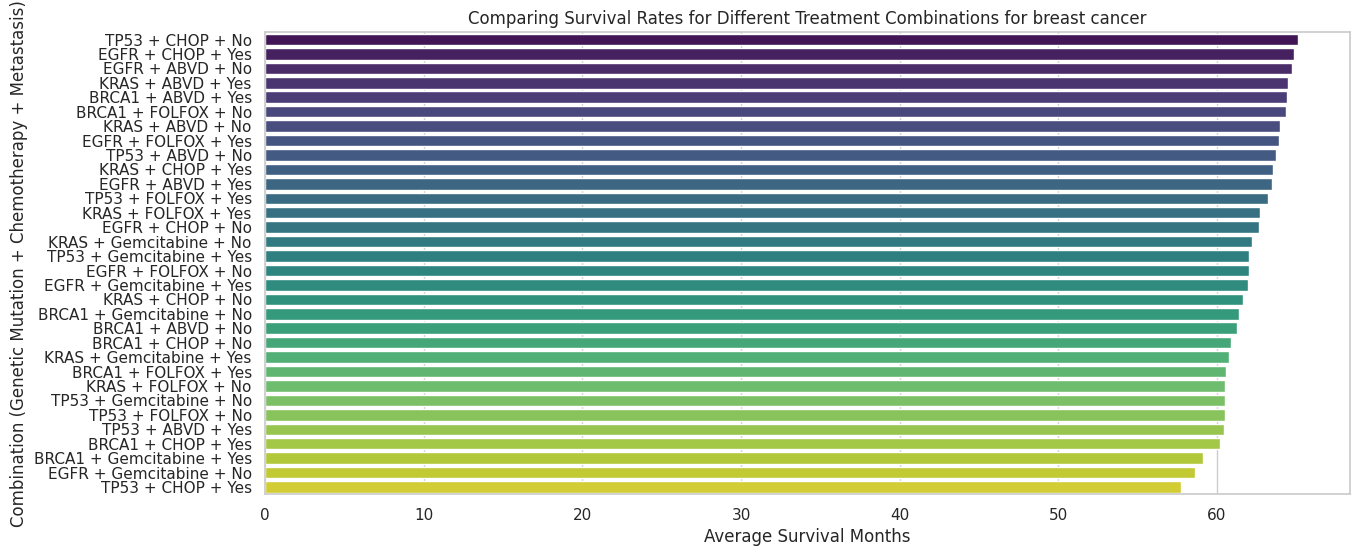

In [ ]:
df_breastsurvival_rates['Combination'] = (
    df_breastsurvival_rates['Genetic_Mutation'] + " + " +
    df_breastsurvival_rates['Chemotherapy_Regimen'] + " + " +
    df_breastsurvival_rates['Metastasis_Status']
)
plt.figure(figsize=(14, 6))
sns.barplot(x='Avg_Overall_Survival_Months', y='Combination', data=df_breastsurvival_rates, palette='viridis')

plt.xlabel("Average Survival Months")
plt.ylabel("Combination (Genetic Mutation + Chemotherapy + Metastasis)")
plt.title("Comparing Survival Rates for Different Treatment Combinations for breast cancer")
plt.show()

<ipython-input-78-b0760426e6e1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Overall_Survival_Months', y='Combination', data=colonsurvival_rates, palette='viridis')


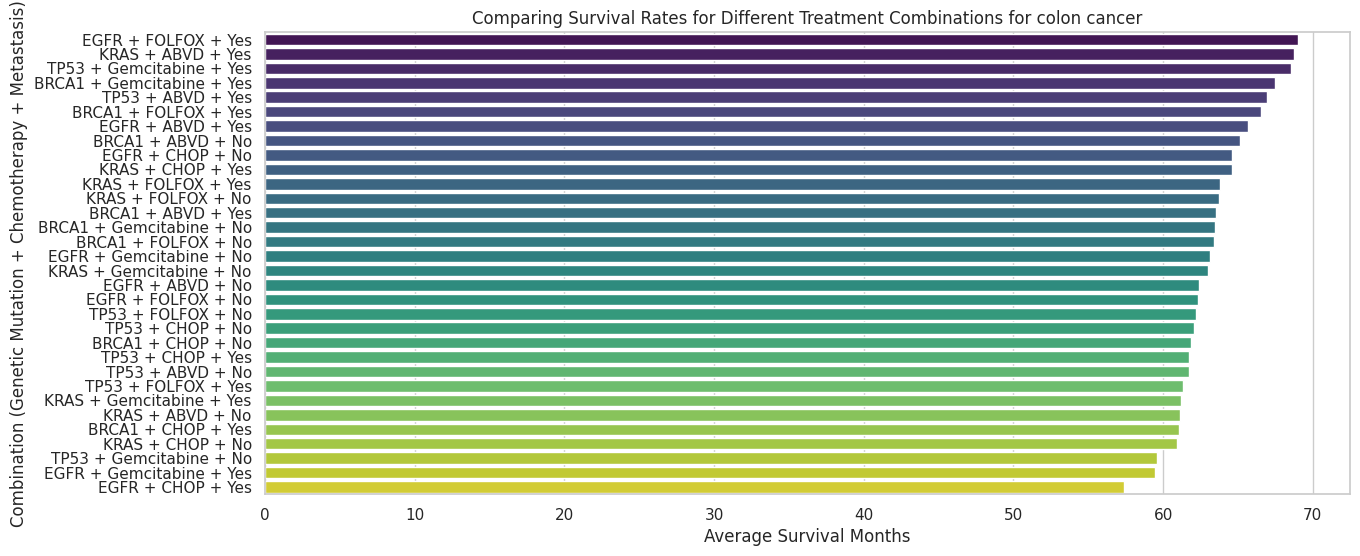

In [ ]:
colonsurvival_rates['Combination'] = (
    colonsurvival_rates['Genetic_Mutation'] + " + " +
    colonsurvival_rates['Chemotherapy_Regimen'] + " + " +
    colonsurvival_rates['Metastasis_Status']
)
plt.figure(figsize=(14, 6))
sns.barplot(x='Avg_Overall_Survival_Months', y='Combination', data=colonsurvival_rates, palette='viridis')

plt.xlabel("Average Survival Months")
plt.ylabel("Combination (Genetic Mutation + Chemotherapy + Metastasis)")
plt.title("Comparing Survival Rates for Different Treatment Combinations for colon cancer")
plt.show()

<ipython-input-79-f75deec94eb5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Overall_Survival_Months', y='Combination', data=leukemiasurvival_rates, palette='viridis')


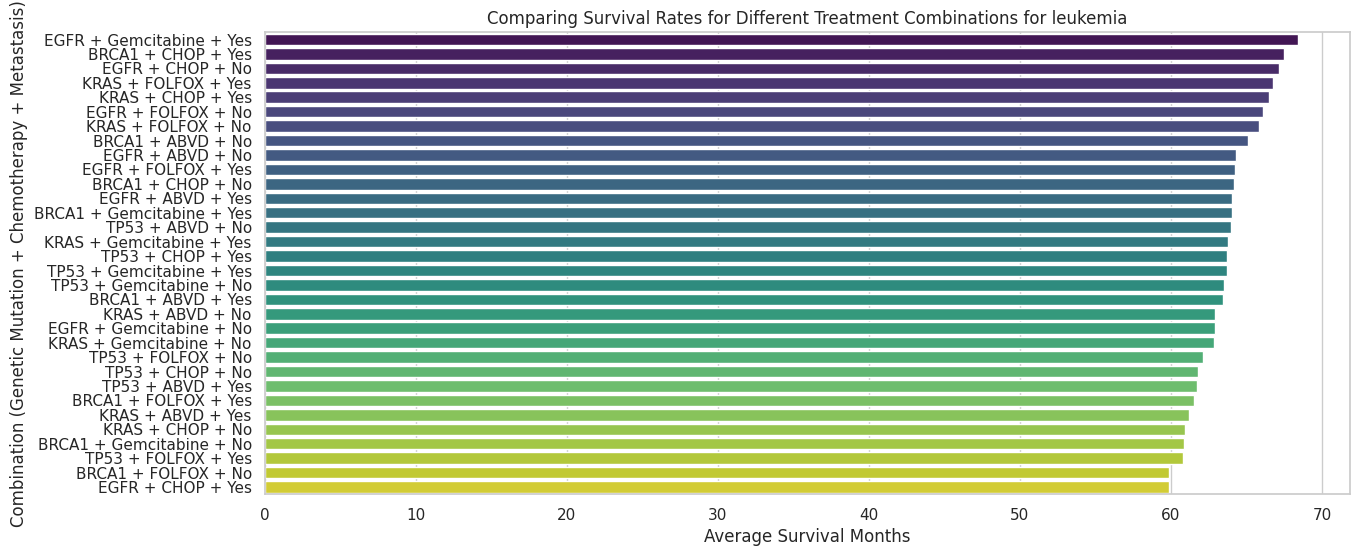

In [ ]:
leukemiasurvival_rates['Combination'] = (
    leukemiasurvival_rates['Genetic_Mutation'] + " + " +
    leukemiasurvival_rates['Chemotherapy_Regimen'] + " + " +
    leukemiasurvival_rates['Metastasis_Status']
)
plt.figure(figsize=(14, 6))
sns.barplot(x='Avg_Overall_Survival_Months', y='Combination', data=leukemiasurvival_rates, palette='viridis')

plt.xlabel("Average Survival Months")
plt.ylabel("Combination (Genetic Mutation + Chemotherapy + Metastasis)")
plt.title("Comparing Survival Rates for Different Treatment Combinations for leukemia")
plt.show()

<ipython-input-80-0e72d9455d62>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Overall_Survival_Months', y='Combination', data=lymphomasurvival_rates, palette='viridis')


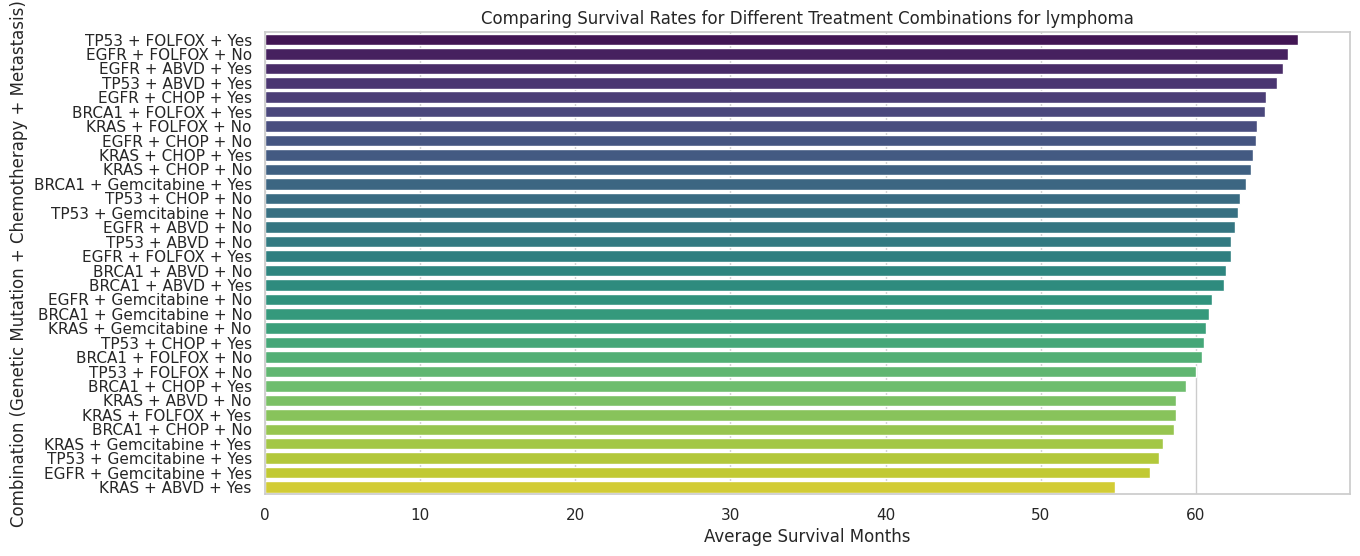

In [ ]:
lymphomasurvival_rates['Combination'] = (
    lymphomasurvival_rates['Genetic_Mutation'] + " + " +
    lymphomasurvival_rates['Chemotherapy_Regimen'] + " + " +
    lymphomasurvival_rates['Metastasis_Status']
)
plt.figure(figsize=(14, 6))
sns.barplot(x='Avg_Overall_Survival_Months', y='Combination', data=lymphomasurvival_rates, palette='viridis')

plt.xlabel("Average Survival Months")
plt.ylabel("Combination (Genetic Mutation + Chemotherapy + Metastasis)")
plt.title("Comparing Survival Rates for Different Treatment Combinations for lymphoma")
plt.show()

<ipython-input-81-c23e2b440106>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Overall_Survival_Months', y='Combination', data=lungsurvival_rates, palette='viridis')


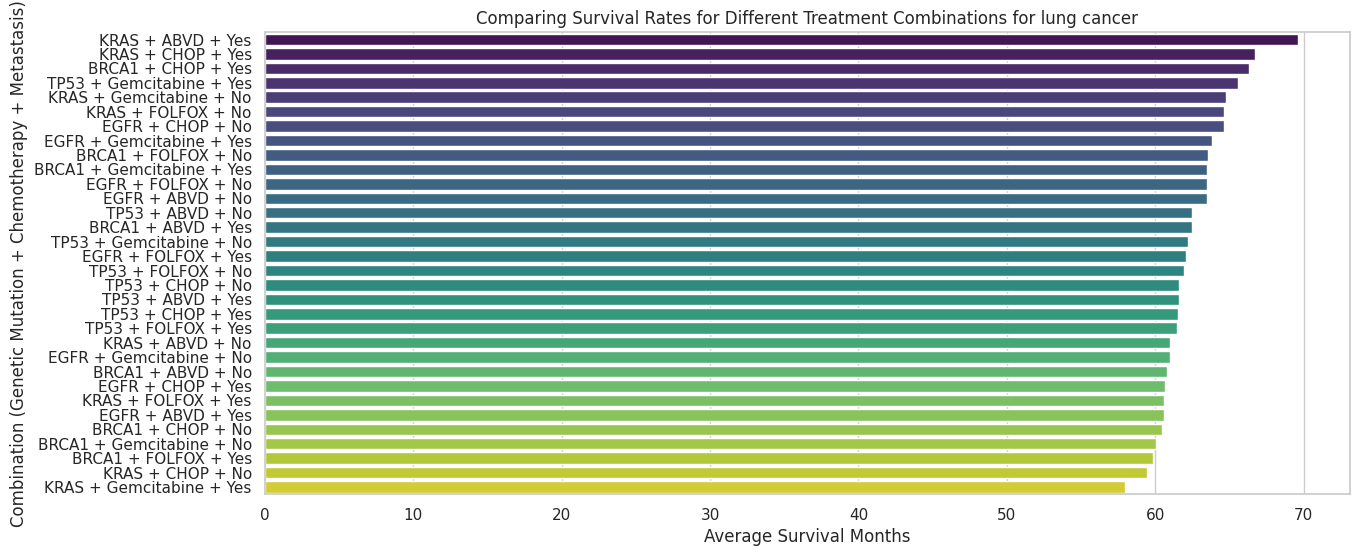

In [ ]:
lungsurvival_rates['Combination'] = (
    lungsurvival_rates['Genetic_Mutation'] + " + " +
    lungsurvival_rates['Chemotherapy_Regimen'] + " + " +
    lungsurvival_rates['Metastasis_Status']
)
plt.figure(figsize=(14, 6))
sns.barplot(x='Avg_Overall_Survival_Months', y='Combination', data=lungsurvival_rates, palette='viridis')

plt.xlabel("Average Survival Months")
plt.ylabel("Combination (Genetic Mutation + Chemotherapy + Metastasis)")
plt.title("Comparing Survival Rates for Different Treatment Combinations for lung cancer")
plt.show()

In [ ]:
breast_best_combination = breastsurvival_rates.iloc[0]
print("🔹 Best Combination for Longest Survival:", breast_best_combination)
breast_worst_combination = breastsurvival_rates.iloc[-1]
print("🔻 Worst Combination for Shortest Survival:", breast_worst_combination)


🔹 Best Combination for Longest Survival: Cancer_Type                              Breast
Genetic_Mutation                           TP53
Chemotherapy_Regimen                       CHOP
Metastasis_Status                            No
Avg_Overall_Survival_Months            65.12474
Combination                    TP53 + CHOP + No
Name: 26, dtype: object
🔻 Worst Combination for Shortest Survival: Cancer_Type                               Breast
Genetic_Mutation                            TP53
Chemotherapy_Regimen                        CHOP
Metastasis_Status                            Yes
Avg_Overall_Survival_Months            57.715116
Combination                    TP53 + CHOP + Yes
Name: 27, dtype: object


In [ ]:
colon_best_combination = colonsurvival_rates.iloc[0]
print("🔹 Best Combination for Longest Survival:", colon_best_combination)
colon_worst_combination = colonsurvival_rates.iloc[-1]
print("🔻 Worst Combination for Shortest Survival:", colon_worst_combination)


🔹 Best Combination for Longest Survival: Cancer_Type                                  Colon
Genetic_Mutation                              EGFR
Chemotherapy_Regimen                        FOLFOX
Metastasis_Status                              Yes
Avg_Overall_Survival_Months              69.032258
Combination                    EGFR + FOLFOX + Yes
Name: 13, dtype: object
🔻 Worst Combination for Shortest Survival: Cancer_Type                                Colon
Genetic_Mutation                            EGFR
Chemotherapy_Regimen                        CHOP
Metastasis_Status                            Yes
Avg_Overall_Survival_Months            57.363636
Combination                    EGFR + CHOP + Yes
Name: 11, dtype: object


In [ ]:
leukemia_best_combination = leukemiasurvival_rates.iloc[0]
print("🔹 Best Combination for Longest Survival:", leukemia_best_combination)
leukemia_worst_combination = leukemiasurvival_rates.iloc[-1]
print("🔻 Worst Combination for Shortest Survival:", leukemia_worst_combination)


🔹 Best Combination for Longest Survival: Cancer_Type                                    Leukemia
Genetic_Mutation                                   EGFR
Chemotherapy_Regimen                        Gemcitabine
Metastasis_Status                                   Yes
Avg_Overall_Survival_Months                   68.433333
Combination                    EGFR + Gemcitabine + Yes
Name: 15, dtype: object
🔻 Worst Combination for Shortest Survival: Cancer_Type                             Leukemia
Genetic_Mutation                            EGFR
Chemotherapy_Regimen                        CHOP
Metastasis_Status                            Yes
Avg_Overall_Survival_Months            59.889764
Combination                    EGFR + CHOP + Yes
Name: 11, dtype: object


In [ ]:
lymphoma_best_combination = lymphomasurvival_rates.iloc[0]
print("🔹 Best Combination for Longest Survival:", lymphoma_best_combination)
lymphoma_worst_combination = lymphomasurvival_rates.iloc[-1]
print("🔻 Worst Combination for Shortest Survival:", lymphoma_worst_combination)


🔹 Best Combination for Longest Survival: Cancer_Type                               Lymphoma
Genetic_Mutation                              TP53
Chemotherapy_Regimen                        FOLFOX
Metastasis_Status                              Yes
Avg_Overall_Survival_Months              66.610108
Combination                    TP53 + FOLFOX + Yes
Name: 29, dtype: object
🔻 Worst Combination for Shortest Survival: Cancer_Type                             Lymphoma
Genetic_Mutation                            KRAS
Chemotherapy_Regimen                        ABVD
Metastasis_Status                            Yes
Avg_Overall_Survival_Months            54.777778
Combination                    KRAS + ABVD + Yes
Name: 17, dtype: object


In [ ]:
lung_best_combination = lungsurvival_rates.iloc[0]
print("🔹 Best Combination for Longest Survival:", lung_best_combination)
lung_worst_combination = lungsurvival_rates.iloc[-1]
print("🔻 Worst Combination for Shortest Survival:", lung_worst_combination)


🔹 Best Combination for Longest Survival: Cancer_Type                                 Lung
Genetic_Mutation                            KRAS
Chemotherapy_Regimen                        ABVD
Metastasis_Status                            Yes
Avg_Overall_Survival_Months            69.647799
Combination                    KRAS + ABVD + Yes
Name: 17, dtype: object
🔻 Worst Combination for Shortest Survival: Cancer_Type                                        Lung
Genetic_Mutation                                   KRAS
Chemotherapy_Regimen                        Gemcitabine
Metastasis_Status                                   Yes
Avg_Overall_Survival_Months                   57.974138
Combination                    KRAS + Gemcitabine + Yes
Name: 23, dtype: object


# **Feature Engineering**

In [ ]:
mutation_risk_scores = {
    'Lung': {
        'EGFR': 1,
        'KRAS': 1,
        'TP53': 0.8,
        'BRCA1': 0.3,
        'None': 0
    },
    'Colon': {
        'EGFR': 0.4,
        'KRAS': 1,
        'TP53': 1,
        'BRCA1': 0.2,
        'None': 0
    },
    'Lymphoma': {
        'EGFR': 0.2,
        'KRAS': 0.5,
        'TP53': 1,
        'BRCA1': 0.3,
        'None': 0
    },
    'Leukemia': {
        'EGFR': 0.1,
        'KRAS': 0.6,
        'TP53': 1,
        'BRCA1': 0.2,
        'None': 0
    },
    'Breast': {
        'EGFR': 0.3,
        'KRAS': 0.7,
        'TP53': 1,
        'BRCA1': 1,
        'None': 0
    }
}

# Define a function to retrieve mutation risk
def get_mutation_risk(row):
    cancer_type = row['Cancer_Type']
    mutation = row['Genetic_Mutation']
    return mutation_risk_scores.get(cancer_type, {}).get(mutation, 0)

# Assuming your dataframe is called df
df['Mutation_Risk_Score'] = df.apply(get_mutation_risk, axis=1)

# Display updated DataFrame
print(df[['Cancer_Type', 'Genetic_Mutation', 'Mutation_Risk_Score']].head())

  Cancer_Type Genetic_Mutation  Mutation_Risk_Score
0      Breast            BRCA1                  1.0
1        Lung             KRAS                  1.0
2    Lymphoma            BRCA1                  0.3
3    Lymphoma             EGFR                  0.2
4      Breast             TP53                  1.0


<ipython-input-4-1ec9c392ca24>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mutation_Risk_Score'] = df.apply(get_mutation_risk, axis=1)


In [ ]:
tumor_stage_dict = {
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4
}
df['Tumor Stage Weight'] = df['Tumor_Stage'].map(tumor_stage_dict)


# Calculate Mutation-Tumor Interaction Score
df['Mutation-Tumor Interaction Score'] = df['Mutation_Risk_Score'] * df['Tumor Stage Weight'] * df['Tumor_Size']
print(df['Mutation-Tumor Interaction Score'])

0        17.60
1         5.40
2         1.98
3         4.80
4        17.10
         ...  
52315     3.68
52316     3.99
52317     5.25
52319     8.40
52320     6.40
Name: Mutation-Tumor Interaction Score, Length: 44709, dtype: float64


<ipython-input-5-452978448229>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tumor Stage Weight'] = df['Tumor_Stage'].map(tumor_stage_dict)
<ipython-input-5-452978448229>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mutation-Tumor Interaction Score'] = df['Mutation_Risk_Score'] * df['Tumor Stage Weight'] * df['Tumor_Size']


In [ ]:
metastasis_dict = {
    'Yes': 1,
    'No': 0,
}

df['Metastasis_encoded'] = df['Metastasis_Status'].map(metastasis_dict)


<ipython-input-6-56729745ae4d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Metastasis_encoded'] = df['Metastasis_Status'].map(metastasis_dict)


Standard Deviation:
 Tumor Stage Weight     1.005426
Tumor_Size             2.594576
Metastasis_encoded     0.457815
Mutation_Risk_Score    0.341777
dtype: float64
survival_correlation Matrix:
 Tumor Stage Weight    -0.003255
Tumor_Size             0.003620
Metastasis_encoded     0.006149
Mutation_Risk_Score   -0.007868
dtype: float64
Survival Correlation Matrix:
 Tumor Stage Weight    -0.003255
Tumor_Size             0.003620
Metastasis_encoded     0.006149
Mutation_Risk_Score   -0.007868
dtype: float64


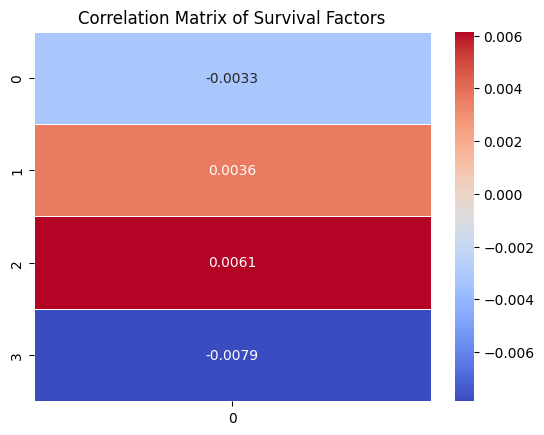

In [ ]:
 #Select relevant columns
columns_of_interest = ["Tumor Stage Weight", "Tumor_Size", "Metastasis_encoded", "Mutation_Risk_Score"]
df_selected = df[columns_of_interest]

# Display first few rows
df_selected.head()
# Compute standard deviation for each column
std_dev = df_selected.std()

print("Standard Deviation:\n", std_dev)
survival_correlation = df_selected.corrwith(df["Overall_Survival_Months"])
print("survival_correlation Matrix:\n", survival_correlation)
survival_correlation = df_selected.corrwith(df["Overall_Survival_Months"])
print("Survival Correlation Matrix:\n", survival_correlation)

# Reshape survival_correlation to a 2D array
survival_correlation = survival_correlation.values.reshape(-1, 1)  # Reshape to (4, 1)


sns.heatmap(survival_correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Survival Factors")
plt.show() # Add plt.show() to display the heatmap

In [ ]:
# Normalize correlation and std deviation
corr_abs = np.abs(survival_correlation.flatten()) / np.abs(survival_correlation).sum()  # Normalize to sum 1 and flatten
std_norm = std_dev / std_dev.sum()  # Normalize to sum 1

# Final weight assignment: Equal contribution from correlation and std
weights = (corr_abs + std_norm) / 2

# Display weights
print(weights)

Tumor Stage Weight     0.192157
Tumor_Size             0.381504
Metastasis_encoded     0.199196
Mutation_Risk_Score    0.227143
dtype: float64


In [ ]:
 # Compute Tumor Aggressiveness Score
df["Tumor Aggressiveness Score"] = (
    df["Tumor Stage Weight"] * weights["Tumor Stage Weight"] +
    df["Tumor_Size"] * weights["Tumor_Size"] +
    df["Metastasis_encoded"] * weights["Metastasis_encoded"] +
    df["Mutation_Risk_Score"] * weights["Mutation_Risk_Score"]
)
df["Tumor Growth Rate (TGR)"] = df["Tumor_Size"] / df["Age"]
def categorize_toxicity(nausea, neutropenia):
    if nausea >= 3 or neutropenia == "Yes":
        return "High"
    elif nausea == 2:
        return "Medium"
    else:
        return "Low"

df["Chemotherapy Toxicity Level"] = df.apply(lambda row: categorize_toxicity(row["Nausea_Severity"], row["Neutropenia"]), axis=1)

<ipython-input-9-f0f784f1c740>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tumor Aggressiveness Score"] = (
<ipython-input-9-f0f784f1c740>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tumor Growth Rate (TGR)"] = df["Tumor_Size"] / df["Age"]
<ipython-input-9-f0f784f1c740>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
# High-Dose Chemotherapy Indicator (Binary: 0/1)
median_dosage = df["Dosage (mg/m²)"].median()
df["High-Dose Chemotherapy Indicator"] = (df["Dosage (mg/m²)"] > median_dosage).astype(int)


<ipython-input-10-f3ae27869188>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["High-Dose Chemotherapy Indicator"] = (df["Dosage (mg/m²)"] > median_dosage).astype(int)


In [ ]:
# Encode Tumor Response Categories
tumor_response_mapping = {
    "Stable": 0,
    "Partial": 1,
    "Progressive": 2,
    "Complete":3
}
df["Tumor_Response_Encoded"] = df["Tumor_Response"].map(tumor_response_mapping)

# Calculate standard deviation for Tumor Response and Overall Survival
std_tumor_response = df["Tumor_Response_Encoded"].std()
std_survival = df["Overall_Survival_Months"].std()

# Calculate correlation
corr_tumor_response = df["Tumor_Response_Encoded"].corr(df["Overall_Survival_Months"])
corr_survival = df["Overall_Survival_Months"].corr(df["Tumor_Response_Encoded"])

# Compute weights using (std + corr) / 2
weight_tumor_response = (std_tumor_response + corr_tumor_response) / 2
weight_survival = (std_survival + corr_survival) / 2

# Normalize the weights so they sum to 1
total_weight = weight_tumor_response + weight_survival
weight_tumor_response /= total_weight
weight_survival /= total_weight

# Compute Treatment Effectiveness Score (TES)
df["Treatment Effectiveness Score (TES)"] = (
    weight_tumor_response * df["Tumor_Response_Encoded"] +
    weight_survival * df["Overall_Survival_Months"]
)
print('tumor response weights:\n', weight_tumor_response)
print('overall survival months weight:\n', weight_survival)
print('total weights:\n',total_weight)

tumor response weights:
 0.031706715008320646
overall survival months weight:
 0.9682932849916793
total weights:
 16.98809466243279


<ipython-input-11-19d5e5e1ccfc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tumor_Response_Encoded"] = df["Tumor_Response"].map(tumor_response_mapping)
<ipython-input-11-19d5e5e1ccfc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Treatment Effectiveness Score (TES)"] = (


In [ ]:
bins = [0, 40, 80, 120]  # Adjust these based on what makes sense
labels = ['Low', 'Medium', 'High']

df['TES Category'] = pd.cut(df['Treatment Effectiveness Score (TES)'], bins=bins, labels=labels, include_lowest=True)
df['Tumor_Impact_Score'] = df['Tumor_Size'] * df['Tumor Stage Weight'] * df['Mutation_Risk_Score']

<ipython-input-12-b7d29515bc18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TES Category'] = pd.cut(df['Treatment Effectiveness Score (TES)'], bins=bins, labels=labels, include_lowest=True)
<ipython-input-12-b7d29515bc18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tumor_Impact_Score'] = df['Tumor_Size'] * df['Tumor Stage Weight'] * df['Mutation_Risk_Score']


In [ ]:
def categorize_age(age):
    if age < 20:
        return "<20"
    elif 21 <= age <= 40:
        return "21-40"
    elif 41 <= age <= 60:
        return "41-60"
    else:
        return ">60"

# Apply the function to create the 'Age Group' column
df['Age Group'] = df['Age'].apply(categorize_age)

<ipython-input-13-1bd2adb888de>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Group'] = df['Age'].apply(categorize_age)


In [ ]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

<ipython-input-14-789317c982b8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI_Category'] = df['BMI'].apply(categorize_bmi)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44709 entries, 0 to 52320
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Patient_ID                           44709 non-null  object  
 1   Age                                  44709 non-null  int64   
 2   Sex                                  44709 non-null  object  
 3   BMI                                  44709 non-null  float64 
 4   Smoking_Status                       44709 non-null  object  
 5   Cancer_Type                          44709 non-null  object  
 6   Genetic_Mutation                     44709 non-null  object  
 7   Tumor_Stage                          44709 non-null  object  
 8   Tumor_Size                           44709 non-null  float64 
 9   Metastasis_Status                    44709 non-null  object  
 10  Chemotherapy_Regimen                 44709 non-null  object  
 11  Dosage (mg/m²)      

# **FE EDA**

In [ ]:
print(df.describe())

                Age           BMI    Tumor_Size  Dosage (mg/m²)  \
count  44709.000000  44709.000000  44709.000000    44709.000000   
mean      57.059138     26.743266      5.492943      325.343011   
std       15.870703      4.759667      2.594576      158.530922   
min       30.000000     18.500000      1.000000       50.000000   
25%       43.000000     22.600000      3.200000      187.500000   
50%       57.000000     26.800000      5.500000      325.700000   
75%       71.000000     30.900000      7.700000      463.000000   
max       84.000000     35.000000     10.000000      600.000000   

       Cycles_Completed  Nausea_Severity  Overall_Survival_Months  \
count      44709.000000     44709.000000             44709.000000   
mean           4.001409         2.404303                62.583797   
std            1.997767         1.285181                32.897467   
min            1.000000         1.000000                 6.000000   
25%            2.000000         1.000000           

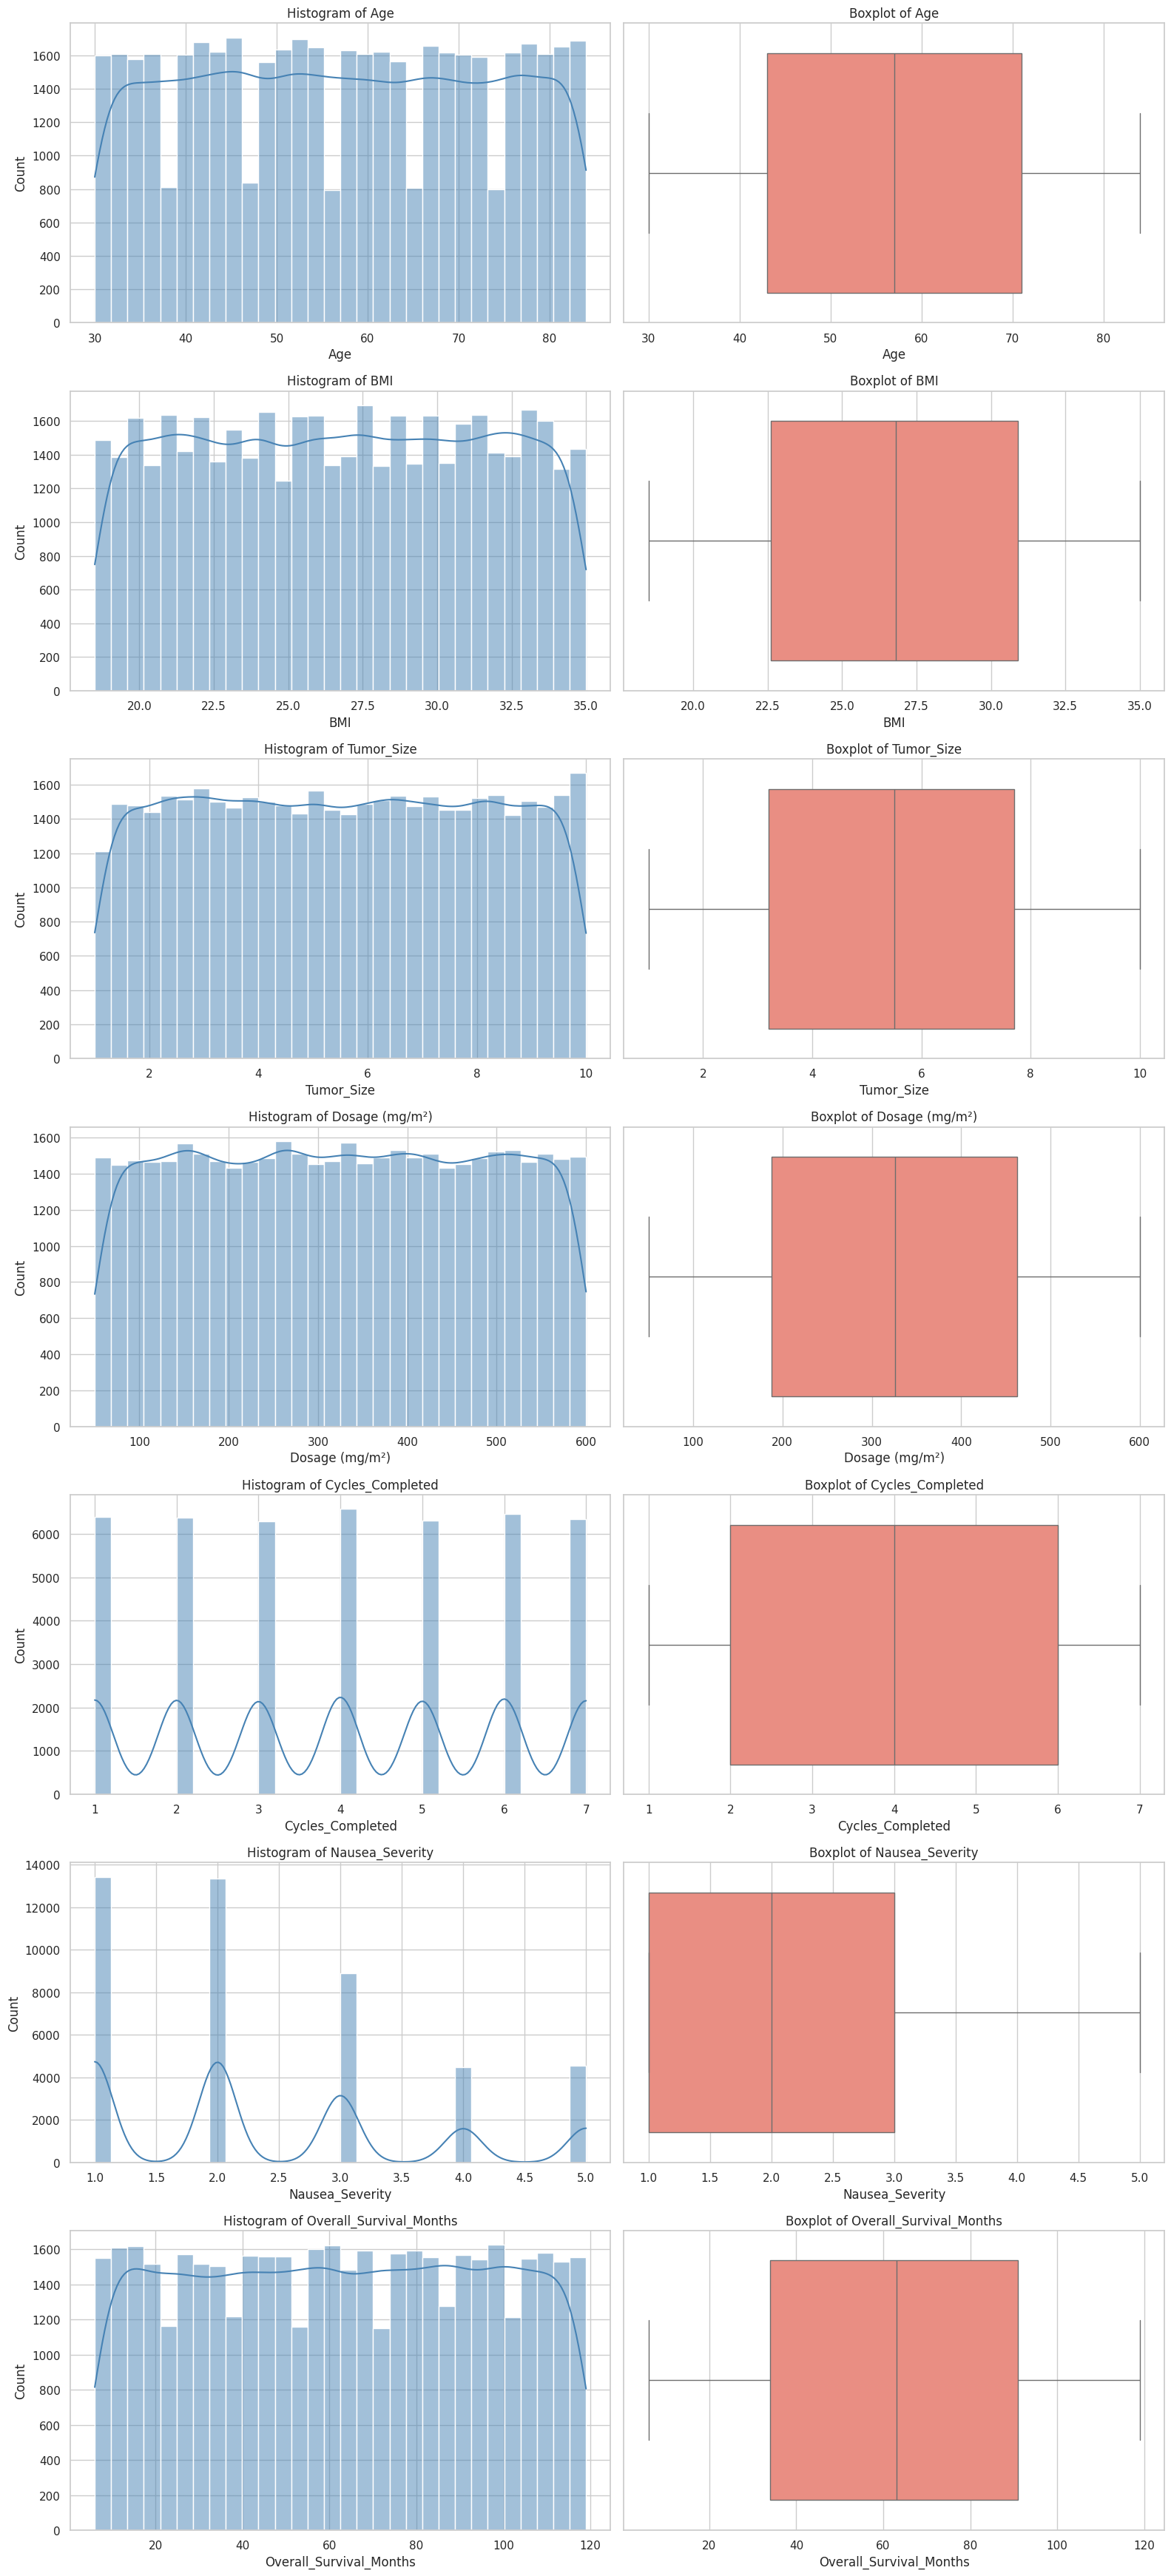

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 5 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 2, 2 * i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f"Histogram of {col}")

    plt.subplot(len(numeric_cols), 2, 2 * i + 2)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

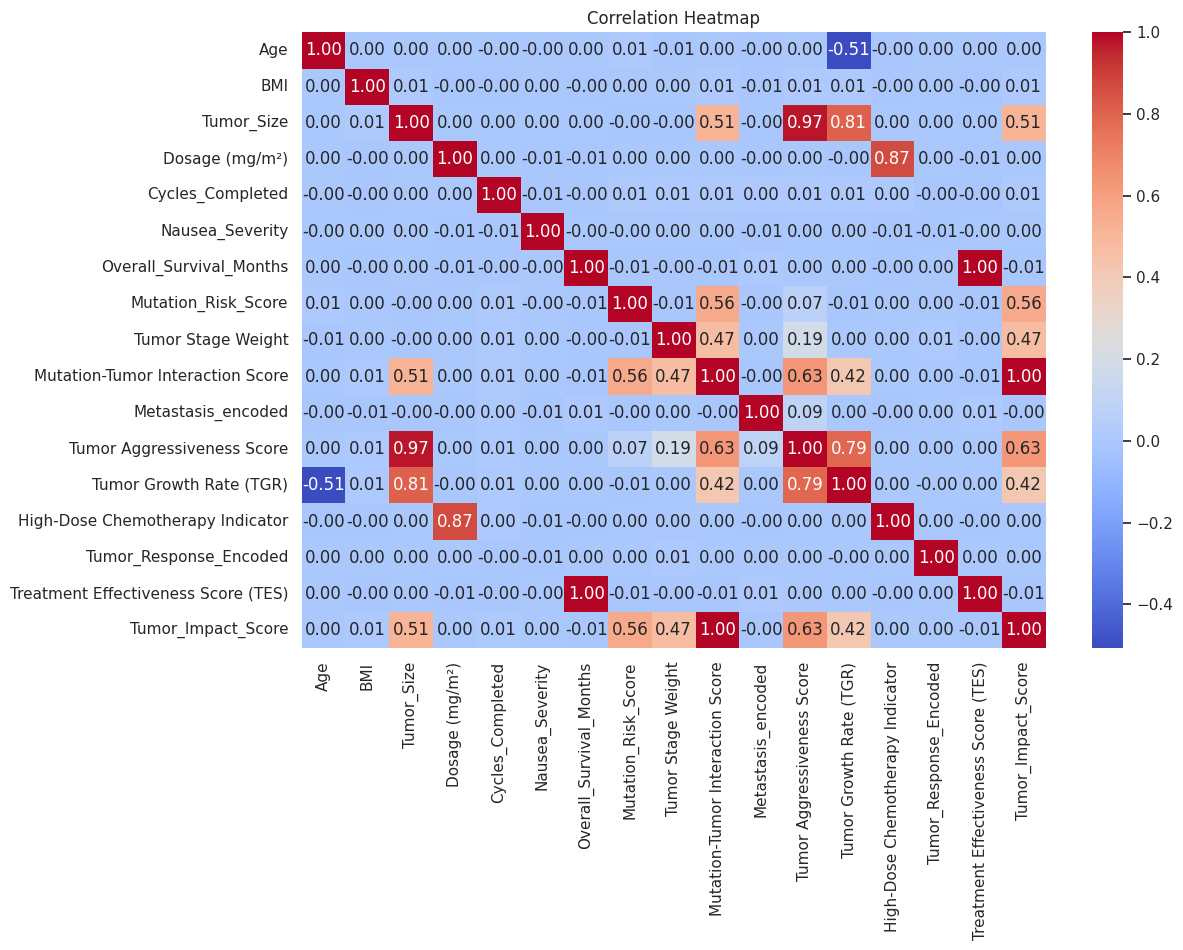

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


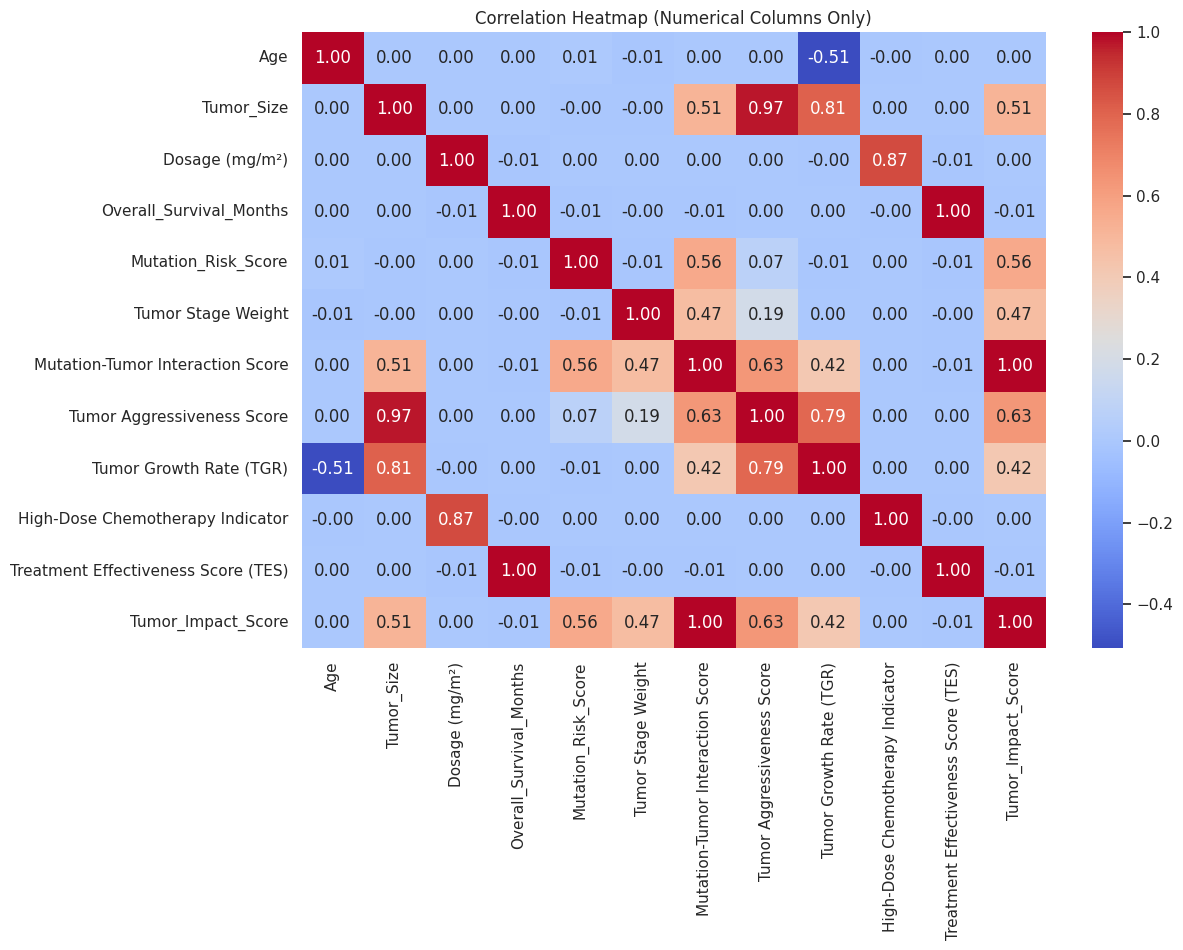

In [ ]:
drop_cols = [
    'Metastasis_encoded',
    'Tumor_Response_Encoded',
    'Nausea_Severity','BMI','Cycles_Completed'
]

numerical_df = df.drop(columns=drop_cols)

correlation_matrix = numerical_df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Numerical Columns Only)")
plt.show()

<ipython-input-102-6bb724ba1469>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Age Group', y='Overall_Survival_Months', estimator=np.mean, palette='viridis')


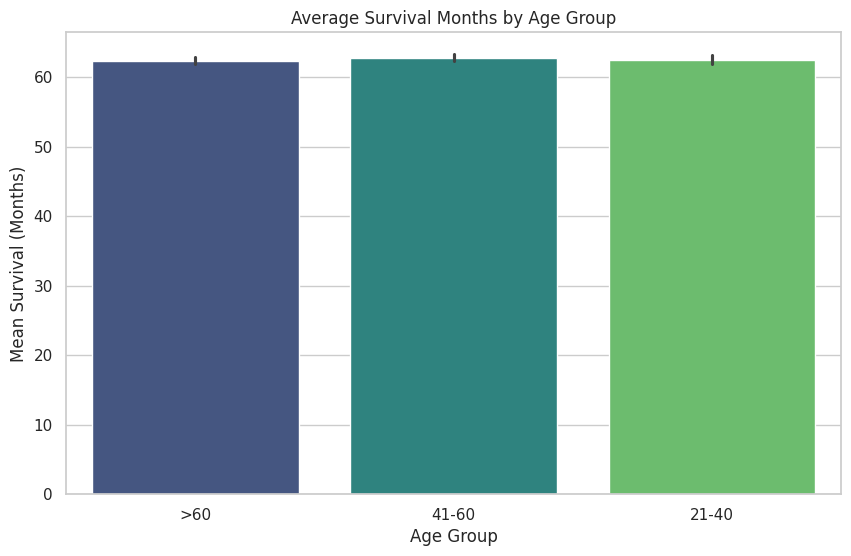

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Age Group', y='Overall_Survival_Months', estimator=np.mean, palette='viridis')
plt.title('Average Survival Months by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Survival (Months)')
plt.show()

<ipython-input-131-e4f300befbcc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='BMI_Category', y='Overall_Survival_Months', estimator=np.mean, palette='cividis')


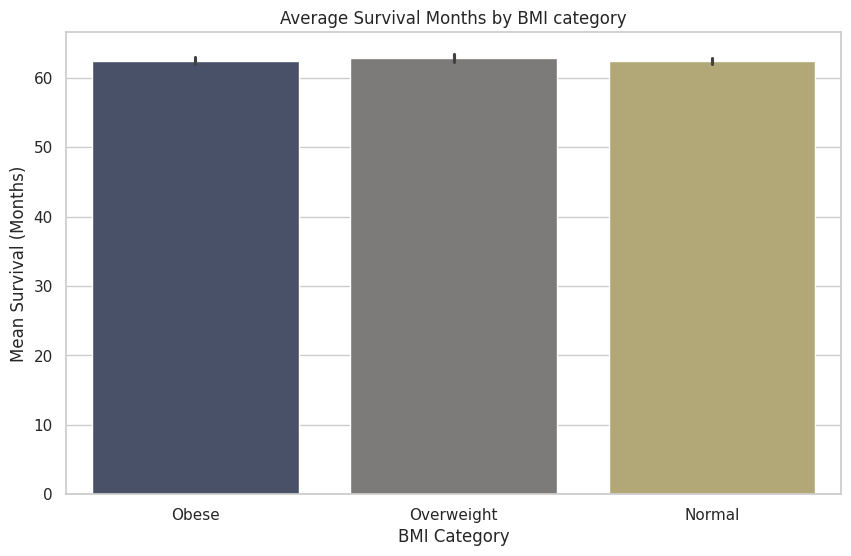

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='BMI_Category', y='Overall_Survival_Months', estimator=np.mean, palette='cividis')
plt.title('Average Survival Months by BMI category')
plt.xlabel('BMI Category')
plt.ylabel('Mean Survival (Months)')
plt.show()

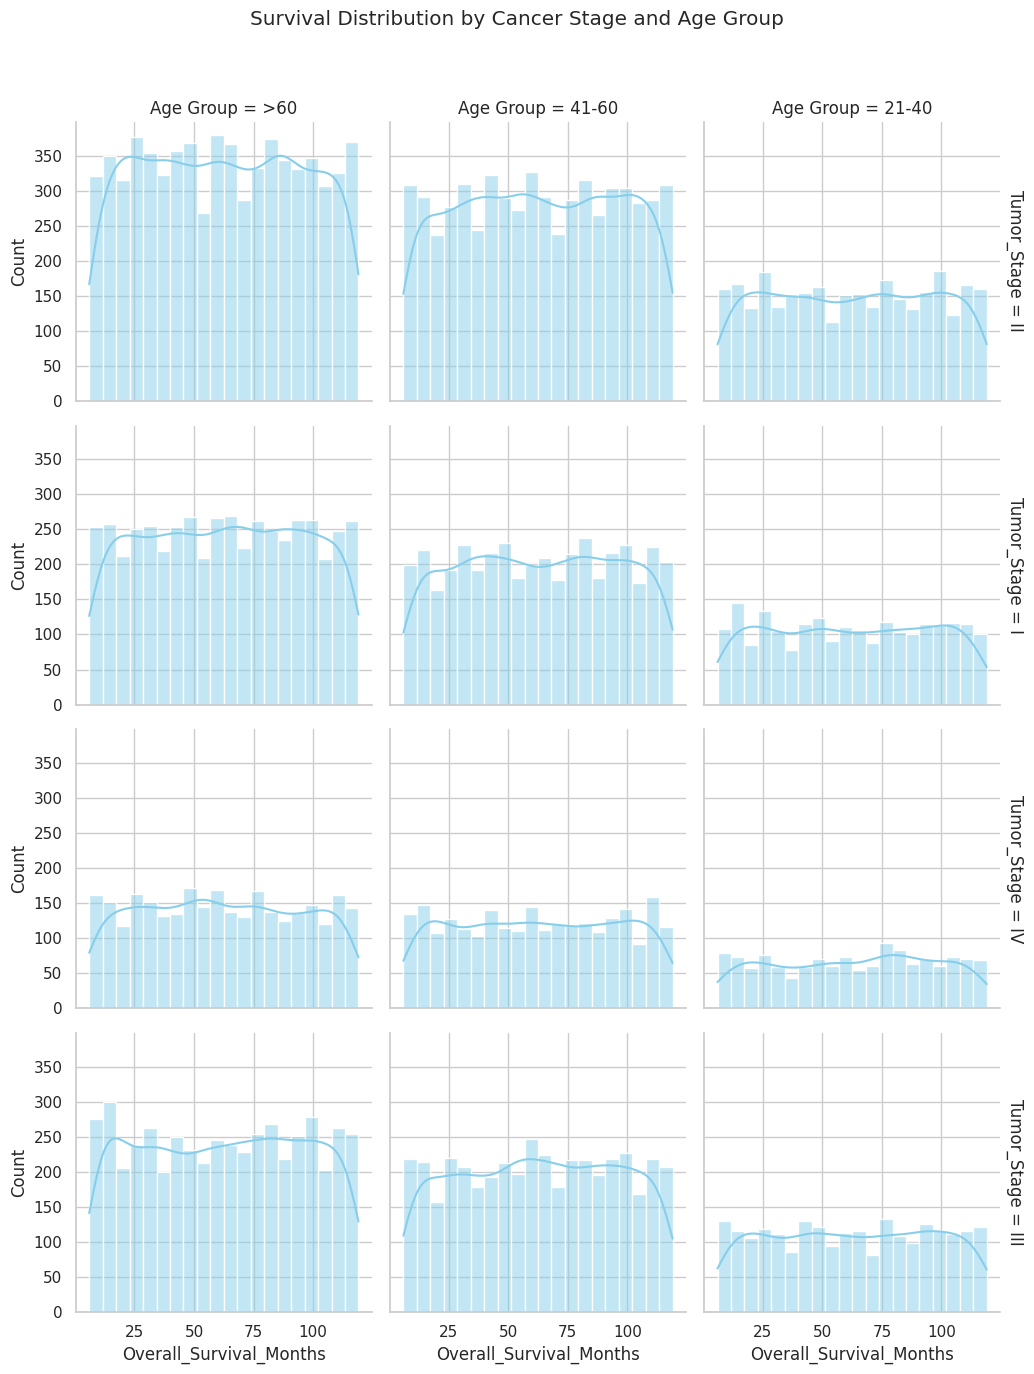

In [ ]:
g = sns.FacetGrid(df, col='Age Group', row='Tumor_Stage', margin_titles=True, height=3.5)
g.map(sns.histplot, 'Overall_Survival_Months', kde=True, bins=20, color='skyblue')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Survival Distribution by Cancer Stage and Age Group')
plt.show()

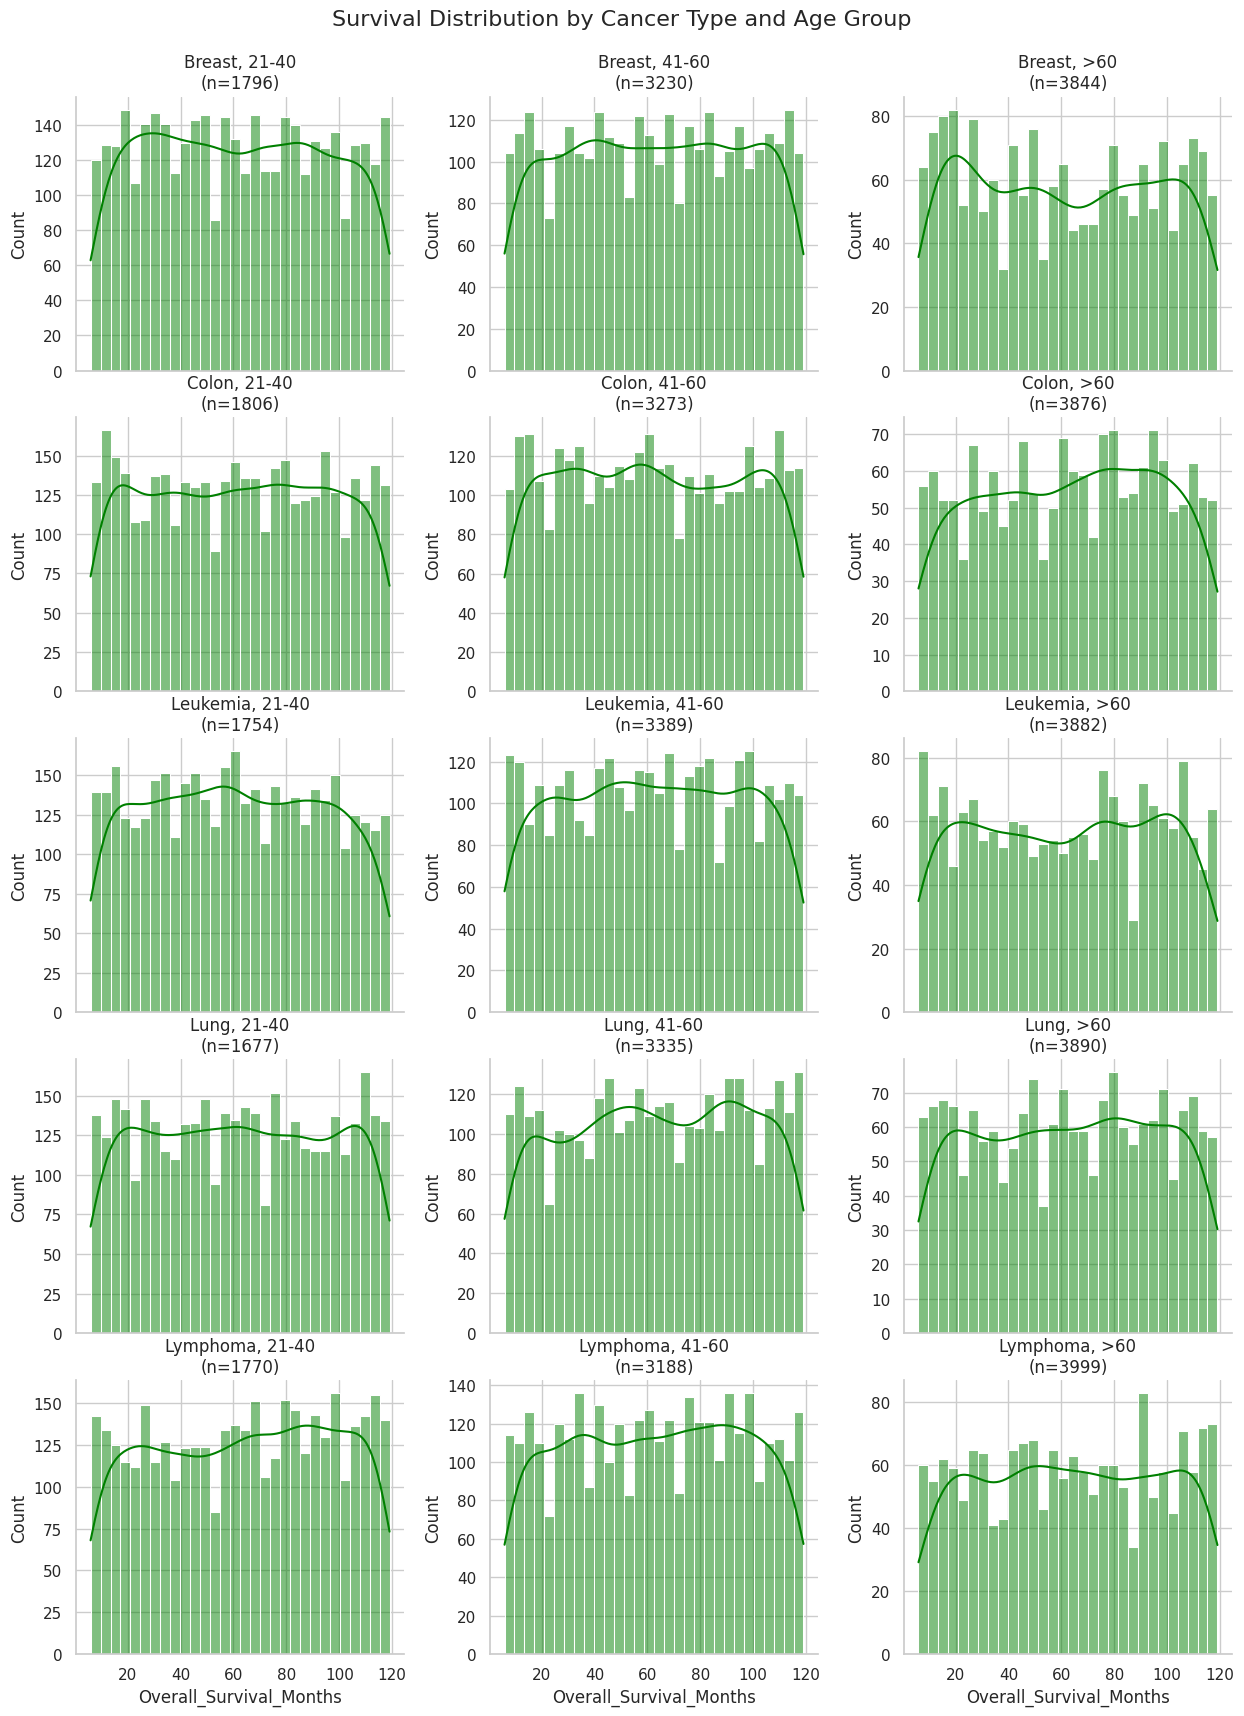

In [ ]:
g = sns.FacetGrid(df, row="Cancer_Type", col="Age Group", sharey=False, height=3.5, aspect=1.2)
g.map(sns.histplot, "Overall_Survival_Months", bins=30, kde=True, color='green')
for ax, (cancer, age) in zip(g.axes.flat, df.groupby(['Cancer_Type', 'Age Group']).size().index):
    count = df[(df['Cancer_Type'] == cancer) & (df['Age Group'] == age)].shape[0]
    ax.set_title(f"{cancer}, {age}\n(n={count})")
plt.subplots_adjust(top=0.93)
g.fig.suptitle("Survival Distribution by Cancer Type and Age Group", fontsize=16)

plt.show()

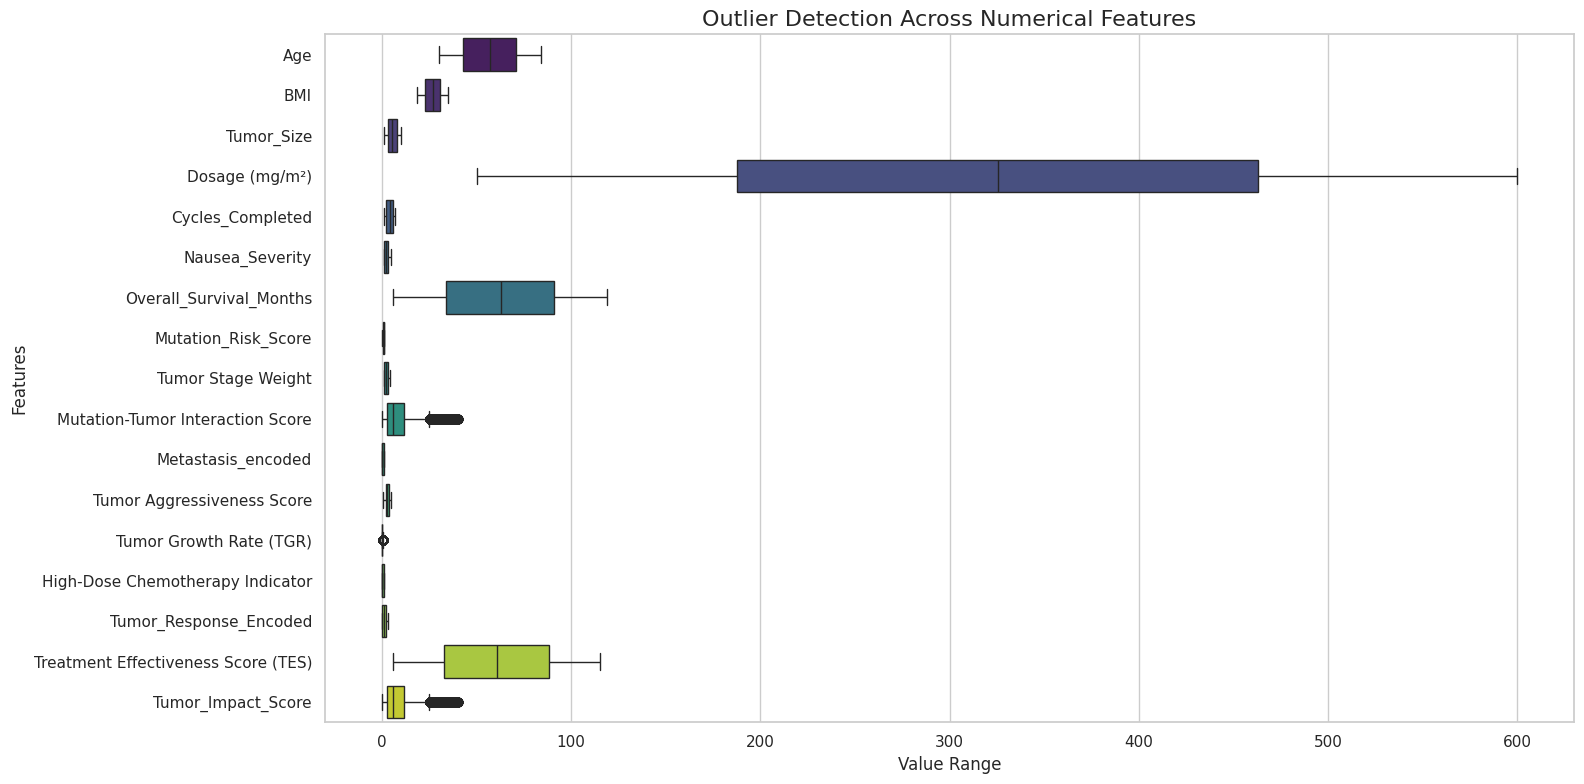

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[numerical_cols], orient='h', palette='viridis')
plt.title('Outlier Detection Across Numerical Features', fontsize=16)
plt.xlabel('Value Range')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# **Survival analysis**

In [ ]:
chemotherapy_regimen_vs_survival = df.groupby([ 'Chemotherapy_Regimen'])['Overall_Survival_Months'].mean().reset_index()

chemotherapy_regimen_vs_survival = chemotherapy_regimen_vs_survival.sort_values(by='Overall_Survival_Months', ascending=False)


df_chemotherapy_regimen_vs_survival = chemotherapy_regimen_vs_survival
df_chemotherapy_regimen_vs_survival.rename(columns={'Overall_Survival_Months': 'Avg_Overall_Survival_Months'}, inplace=True)
print(df_chemotherapy_regimen_vs_survival)

  Chemotherapy_Regimen  Avg_Overall_Survival_Months
0                 ABVD                    62.931402
2               FOLFOX                    62.753365
1                 CHOP                    62.477700
3          Gemcitabine                    61.998500


<ipython-input-108-566cf32439ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chemotherapy_Regimen', y='Avg_Overall_Survival_Months', data=df_chemotherapy_regimen_vs_survival,palette='colorblind')


Text(0.5, 1.0, 'Average Overall Survival by Chemotherapy Regimen')

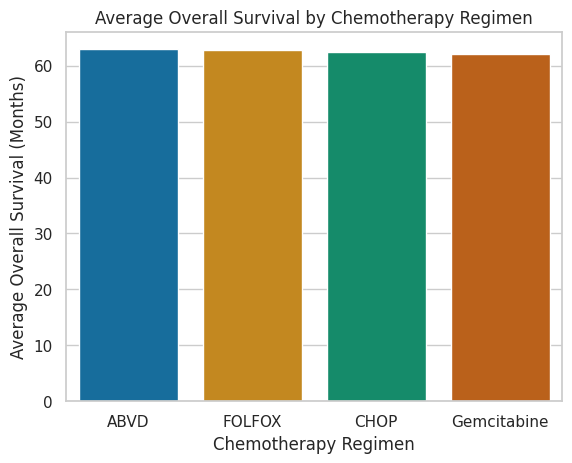

In [ ]:
sns.barplot(x='Chemotherapy_Regimen', y='Avg_Overall_Survival_Months', data=df_chemotherapy_regimen_vs_survival,palette='colorblind')
plt.xlabel('Chemotherapy Regimen')
plt.ylabel('Average Overall Survival (Months)')
plt.title('Average Overall Survival by Chemotherapy Regimen')


<ipython-input-109-039b742f51d6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genetic_Mutation', y='Avg_Overall_Survival_Months', data=df_genetic_mutation_vs_survival,palette='husl')


  Genetic_Mutation  Avg_Overall_Survival_Months
1             EGFR                    63.341275
2             KRAS                    62.577076
3             TP53                    62.287242
0            BRCA1                    62.276585


Text(0.5, 1.0, 'Average Overall Survival by Genetic Mutation')

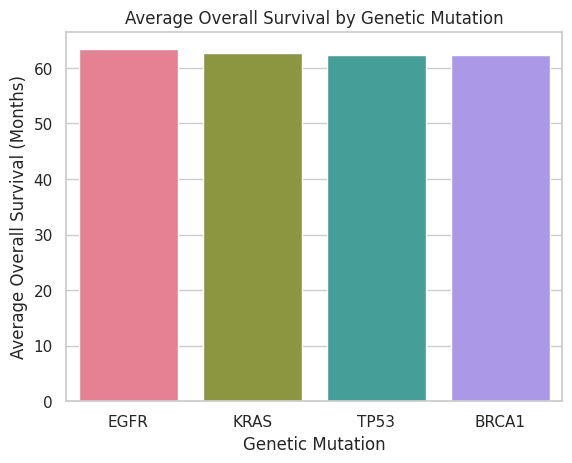

In [ ]:
genetic_mutation_vs_survival = df.groupby([ 'Genetic_Mutation'])['Overall_Survival_Months'].mean().reset_index()

genetic_mutation_vs_survival =genetic_mutation_vs_survival.sort_values(by='Overall_Survival_Months', ascending=False)


df_genetic_mutation_vs_survival = genetic_mutation_vs_survival
df_genetic_mutation_vs_survival.rename(columns={'Overall_Survival_Months': 'Avg_Overall_Survival_Months'}, inplace=True)
print(df_genetic_mutation_vs_survival)
sns.barplot(x='Genetic_Mutation', y='Avg_Overall_Survival_Months', data=df_genetic_mutation_vs_survival,palette='husl')
plt.xlabel('Genetic Mutation')
plt.ylabel('Average Overall Survival (Months)')
plt.title('Average Overall Survival by Genetic Mutation')

  Metastasis_Status  Avg_Overall_Survival_Months
1               Yes                    62.893544
0                No                    62.451694


<ipython-input-110-bf5c4d8f6f6f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metastasis_Status', y='Avg_Overall_Survival_Months', data=df_metastasis_vs_survival , palette="autumn")


Text(0.5, 1.0, 'Average Overall Survival by Metastasis Status')

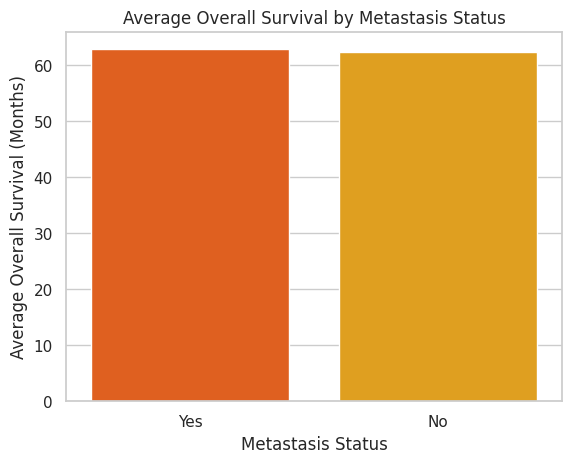

In [ ]:
metastasis_vs_survival = df.groupby([ 'Metastasis_Status'])['Overall_Survival_Months'].mean().reset_index()

metastasis_vs_survival =metastasis_vs_survival.sort_values(by='Overall_Survival_Months', ascending=False)

df_metastasis_vs_survival = metastasis_vs_survival
df_metastasis_vs_survival.rename(columns={'Overall_Survival_Months': 'Avg_Overall_Survival_Months'}, inplace=True)
print(df_metastasis_vs_survival)
sns.barplot(x='Metastasis_Status', y='Avg_Overall_Survival_Months', data=df_metastasis_vs_survival , palette="autumn")
plt.xlabel('Metastasis Status')
plt.ylabel('Average Overall Survival (Months)')
plt.title('Average Overall Survival by Metastasis Status')

  BMI_Category  Overall_Survival_Months
2   Overweight                62.836547
0       Normal                62.490313
1        Obese                62.451920


<ipython-input-111-33d48dca446e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BMI_Category', y='Overall_Survival_Months', data=BMI_Category_vs_survival,palette='colorblind')


Text(0, 0.5, 'Average Overall Survival (Months)')

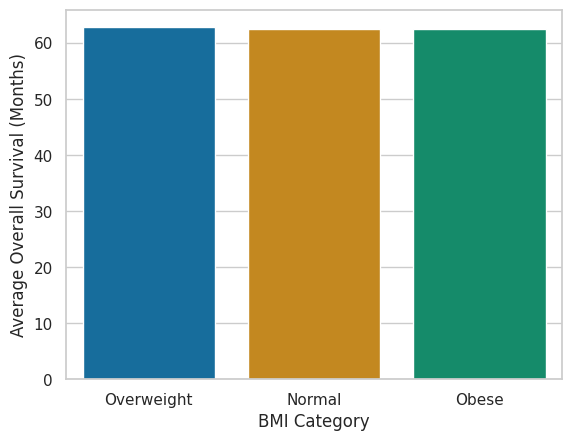

In [ ]:
BMI_Category_vs_survival = df.groupby([ 'BMI_Category'])['Overall_Survival_Months'].mean().reset_index()

BMI_Category_vs_survival =BMI_Category_vs_survival.sort_values(by='Overall_Survival_Months', ascending=False)
print(BMI_Category_vs_survival)
sns.barplot(x='BMI_Category', y='Overall_Survival_Months', data=BMI_Category_vs_survival,palette='colorblind')
plt.xlabel('BMI Category')
plt.ylabel('Average Overall Survival (Months)')

<ipython-input-112-b723fd8b7107>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cancer_Type', y='Overall_Survival_Months', data=cancertype_vs_survival,palette='colorblind')


  Cancer_Type  Overall_Survival_Months
2    Leukemia                63.426039
1       Colon                63.040871
3        Lung                62.403280
0      Breast                62.176325
4    Lymphoma                61.861114


Text(0, 0.5, 'Average Overall Survival (Months)')

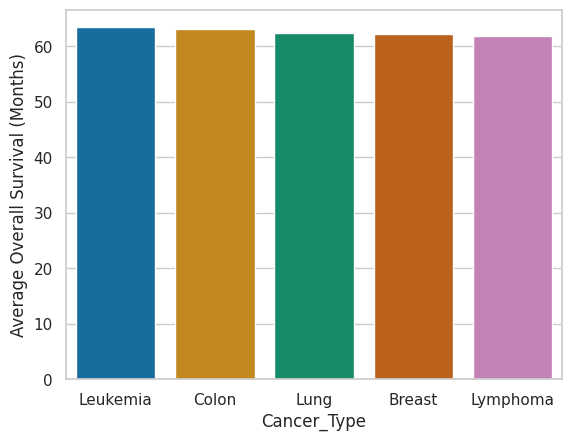

In [ ]:
cancertype_vs_survival = df.groupby([ 'Cancer_Type'])['Overall_Survival_Months'].mean().reset_index()

cancertype_vs_survival =cancertype_vs_survival.sort_values(by='Overall_Survival_Months', ascending=False)
print(cancertype_vs_survival)
sns.barplot(x='Cancer_Type', y='Overall_Survival_Months', data=cancertype_vs_survival,palette='colorblind')
plt.xlabel('Cancer_Type')
plt.ylabel('Average Overall Survival (Months)')

In [ ]:
survival_rates = df.groupby(['Cancer_Type','Genetic_Mutation', 'Chemotherapy_Regimen', 'Metastasis_Status','Age Group','TES Category','Smoking_Status','BMI_Category' ])['Overall_Survival_Months'].mean().reset_index()

survival_rates = survival_rates.sort_values(by='Overall_Survival_Months', ascending=False)

<ipython-input-113-37d75f6857d3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df.groupby(['Cancer_Type','Genetic_Mutation', 'Chemotherapy_Regimen', 'Metastasis_Status','Age Group','TES Category','Smoking_Status','BMI_Category' ])['Overall_Survival_Months'].mean().reset_index()


In [ ]:
df

Patient_ID  Age     Sex   BMI Smoking_Status Cancer_Type  \
0         P00001   68    Male  31.5         Former      Breast   
1         P00002   81  Female  25.8         Former        Lung   
2         P00003   58    Male  22.3         Former    Lymphoma   
3         P00004   44    Male  33.6          Never    Lymphoma   
4         P00005   72    Male  23.7          Never      Breast   
...          ...  ...     ...   ...            ...         ...   
52315     P52316   61  Female  26.6        Current       Colon   
52316     P52317   78  Female  29.3        Current      Breast   
52317     P52318   60  Female  22.3        Current      Breast   
52319     P52320   44    Male  32.6          Never    Leukemia   
52320     P52321   32  Female  25.1          Never      Breast   

      Genetic_Mutation Tumor_Stage  Tumor_Size Metastasis_Status  ...  \
0                BRCA1          II         8.8                No  ...   
1                 KRAS           I         5.4               Yes  ...   
2                BRCA1          II         3.3                No  ...   
3                 EGFR          IV         6.0                No  ...   
4                 TP53         III         5.7                No  ...   
...                ...         ...         ...               ...  ...   
52315            BRCA1          IV         4.6                No  ...   
52316             KRAS         III         1.9                No  ...   
52317             KRAS           I         7.5                No  ...   
52319             TP53           I         8.4                No  ...   
52320             TP53          II         3.2               Yes  ...   

      Tumor Aggressiveness Score  Tumor Growth Rate (TGR)  \
0                       3.968692                 0.129412   
1                       2.678617                 0.066667   
2                       1.711420                 0.056897   
3                       3.103081                 0.136364   
4                       2.978187                 0.079167   
...                          ...                      ...   
52315                   2.568975                 0.075410   
52316                   1.460329                 0.024359   
52317                   3.212437                 0.125000   
52319                   3.623933                 0.190909   
52320                   2.031466                 0.100000   

       Chemotherapy Toxicity Level  High-Dose Chemotherapy Indicator  \
0                             High                                 1   
1                             High                                 1   
2                             High                                 0   
3                             High                                 0   
4                             High                                 1   
...                            ...                               ...   
52315                         High                                 1   
52316                         High                                 0   
52317                         High                                 0   
52319                         High                                 0   
52320                       Medium                                 0   

      Tumor_Response_Encoded Treatment Effectiveness Score (TES)  \
0                          0                           85.209809   
1                          0                           16.460986   
2                          1                           57.161011   
3                          1                           45.541491   
4                          2                           85.273223   
...                      ...                                 ...   
52315                      3                           46.573198   
52316                      1                           52.319544   
52317                      0                          114.258608   
52319                      2                           21.

In [ ]:
survival_rates

Cancer_Type Genetic_Mutation Chemotherapy_Regimen Metastasis_Status  \
12144    Lymphoma             KRAS               FOLFOX               Yes   
7903         Lung            BRCA1                 ABVD               Yes   
8936         Lung             EGFR          Gemcitabine                No   
8418         Lung            BRCA1          Gemcitabine               Yes   
2209       Breast             TP53                 CHOP               Yes   
...           ...              ...                  ...               ...   
12901    Lymphoma             TP53          Gemcitabine               Yes   
12914    Lymphoma             TP53          Gemcitabine               Yes   
12918    Lymphoma             TP53          Gemcitabine               Yes   
12924    Lymphoma             TP53          Gemcitabine               Yes   
12952    Lymphoma             TP53          Gemcitabine               Yes   

      Age Group TES Category Smoking_Status BMI_Category  \
12144       >60         High         Former       Normal   
7903      41-60         High        Current        Obese   
8936      21-40         High          Never   Overweight   
8418        >60         High         Former       Normal   
2209      21-40         High         Former        Obese   
...         ...          ...            ...          ...   
12901     21-40         High         Former        Obese   
12914     41-60          Low          Never   Overweight   
12918     41-60       Medium         Former       Normal   
12924     41-60         High        Current       Normal   
12952       >60         High        Current        Obese   

       Overall_Survival_Months  
12144                    119.0  
7903                     119.0  
8936                     119.0  
8418                     119.0  
2209                     119.0  
...                        ...  
12901                      NaN  
12914                      NaN  
12918                      NaN  
12924                      NaN  
12952                      NaN  

[12960 rows x 9 columns]

In [ ]:
dfsurvival_rates=survival_rates
dfsurvival_rates.dropna(subset='Overall_Survival_Months', inplace=True)

In [ ]:
best_combination = survival_rates.iloc[0]
print("🔹 Best Combination for Longest Survival:", best_combination)
worst_combination = survival_rates.iloc[-1]
print("🔻 Worst Combination for Shortest Survival:", worst_combination)

🔹 Best Combination for Longest Survival: Cancer_Type                Lymphoma
Genetic_Mutation               KRAS
Chemotherapy_Regimen         FOLFOX
Metastasis_Status               Yes
Age Group                       >60
TES Category                   High
Smoking_Status               Former
BMI_Category                 Normal
Overall_Survival_Months       119.0
Name: 12144, dtype: object
🔻 Worst Combination for Shortest Survival: Cancer_Type                  Lymphoma
Genetic_Mutation                BRCA1
Chemotherapy_Regimen             CHOP
Metastasis_Status                  No
Age Group                       21-40
TES Category                      Low
Smoking_Status                 Former
BMI_Category               Overweight
Overall_Survival_Months           6.0
Name: 10535, dtype: object


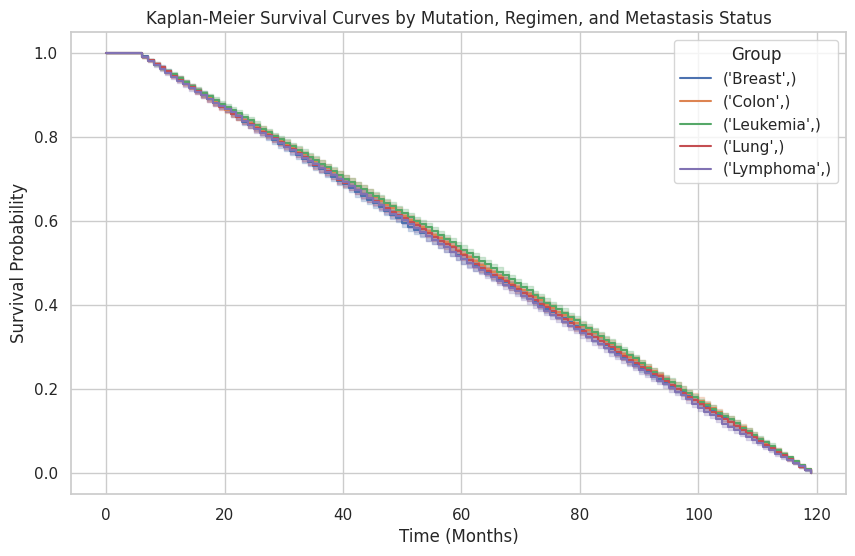

In [ ]:
grouped = df.groupby(['Cancer_Type'])
from lifelines import KaplanMeierFitter
# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Create a plot
plt.figure(figsize=(10, 6))

# Loop through each group and plot Kaplan-Meier curves
for name, group in grouped:
    # Here 'duration' is the survival time and 'event_observed' is the event indicator (1 = event, 0 = censored)
    kmf.fit(group['Overall_Survival_Months'],label=str(name))
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves by Mutation, Regimen, and Metastasis Status')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.show()


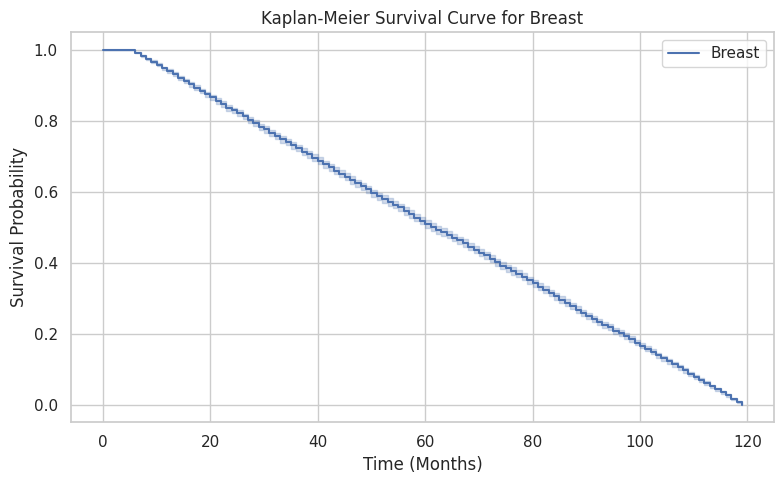

In [ ]:
cancer_type = "Breast"
subset = df[df['Cancer_Type'] == cancer_type].copy()
subset['Overall_Survival_Months'] = pd.to_numeric(subset['Overall_Survival_Months'], errors='coerce')
subset = subset.dropna(subset=['Overall_Survival_Months'])

kmfb = KaplanMeierFitter()

kmfb.fit(durations=subset['Overall_Survival_Months'], event_observed=[1] * len(subset), label=cancer_type)

plt.figure(figsize=(8, 5))
kmfb.plot_survival_function()
plt.title(f'Kaplan-Meier Survival Curve for {cancer_type}')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
dfspb=pd.DataFrame(kmfb.survival_function_)
dfspb


Breast
timeline          
0.0       1.000000
6.0       0.992672
7.0       0.983653
8.0       0.975197
9.0       0.967531
...            ...
115.0     0.034273
116.0     0.025479
117.0     0.016122
118.0     0.007103
119.0     0.000000

[115 rows x 1 columns]

from matplotlib import pyplot as plt
dfspb['Breast'].plot(kind='hist', bins=20, title='Breast')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dfspb['Breast'].plot(kind='line', figsize=(8, 4), title='Breast')
plt.gca().spines[['top', 'right']].set_visible(False)

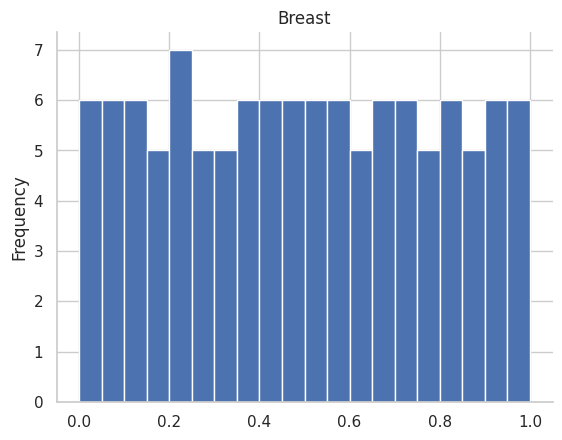

In [ ]:
from matplotlib import pyplot as plt
dfspb['Breast'].plot(kind='hist', bins=20, title='Breast')
plt.gca().spines[['top', 'right',]].set_visible(False)

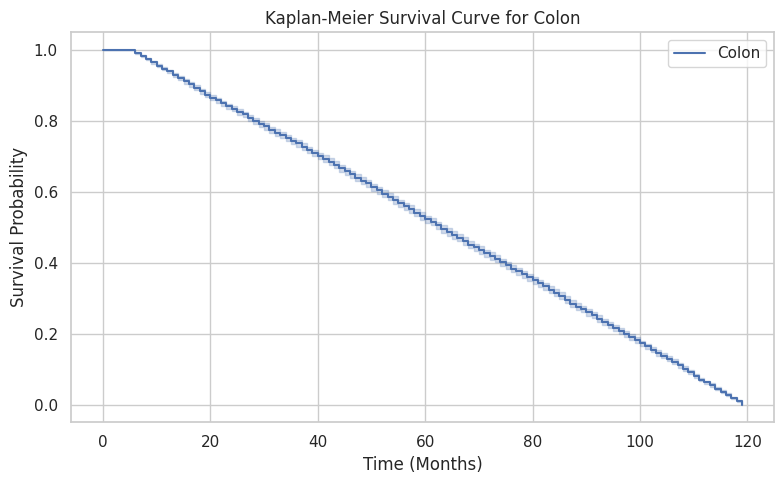

In [ ]:
cancer_type = "Colon"
subset = df[df['Cancer_Type'] == cancer_type].copy()
subset['Overall_Survival_Months'] = pd.to_numeric(subset['Overall_Survival_Months'], errors='coerce')
subset = subset.dropna(subset=['Overall_Survival_Months'])

kmfc = KaplanMeierFitter()

kmfc.fit(durations=subset['Overall_Survival_Months'], event_observed=[1] * len(subset), label=cancer_type)

plt.figure(figsize=(8, 5))
kmfc.plot_survival_function()
plt.title(f'Kaplan-Meier Survival Curve for {cancer_type}')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
dfcpc=pd.DataFrame(kmfc.survival_function_)
dfcpc

Colon
timeline          
0.0       1.000000
6.0       0.991178
7.0       0.982468
8.0       0.975544
9.0       0.965271
...            ...
115.0     0.035958
116.0     0.027694
117.0     0.018984
118.0     0.009827
119.0     0.000000

[115 rows x 1 columns]

from matplotlib import pyplot as plt
dfcpc['Colon'].plot(kind='hist', bins=20, title='Colon')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dfcpc['Colon'].plot(kind='line', figsize=(8, 4), title='Colon')
plt.gca().spines[['top', 'right']].set_visible(False)

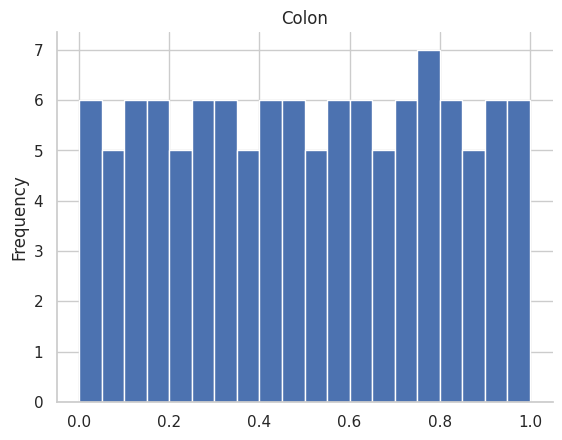

In [ ]:
from matplotlib import pyplot as plt
dfcpc['Colon'].plot(kind='hist', bins=20, title='Colon')
plt.gca().spines[['top', 'right',]].set_visible(False)

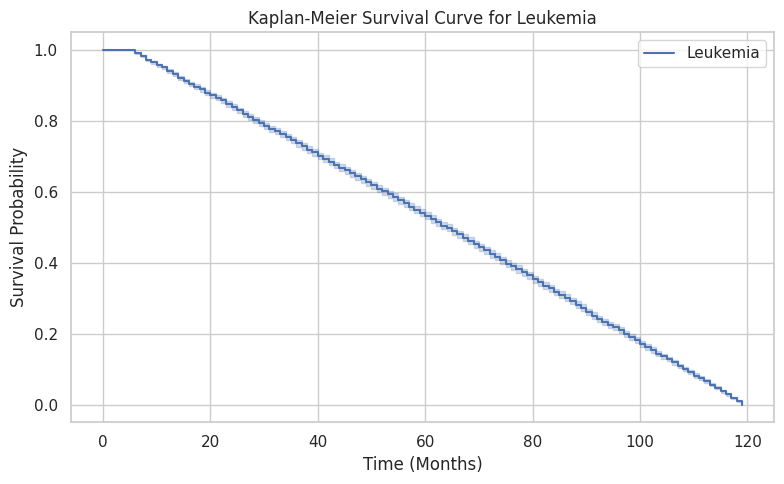

In [ ]:
cancer_type = "Leukemia"
subset = df[df['Cancer_Type'] == cancer_type].copy()
subset['Overall_Survival_Months'] = pd.to_numeric(subset['Overall_Survival_Months'], errors='coerce')
subset = subset.dropna(subset=['Overall_Survival_Months'])

kmfl = KaplanMeierFitter()

kmfl.fit(durations=subset['Overall_Survival_Months'], event_observed=[1] * len(subset), label=cancer_type)

plt.figure(figsize=(8, 5))
kmfl.plot_survival_function()
plt.title(f'Kaplan-Meier Survival Curve for {cancer_type}')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
dfspl=pd.DataFrame(kmfl.survival_function_)
dfspl

Leukemia
timeline          
0.0       1.000000
6.0       0.991801
7.0       0.983380
8.0       0.972964
9.0       0.964986
...            ...
115.0     0.037562
116.0     0.028587
117.0     0.018615
118.0     0.009086
119.0     0.000000

[115 rows x 1 columns]

from matplotlib import pyplot as plt
dfspl['Leukemia'].plot(kind='hist', bins=20, title='Leukemia')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dfspl['Leukemia'].plot(kind='line', figsize=(8, 4), title='Leukemia')
plt.gca().spines[['top', 'right']].set_visible(False)

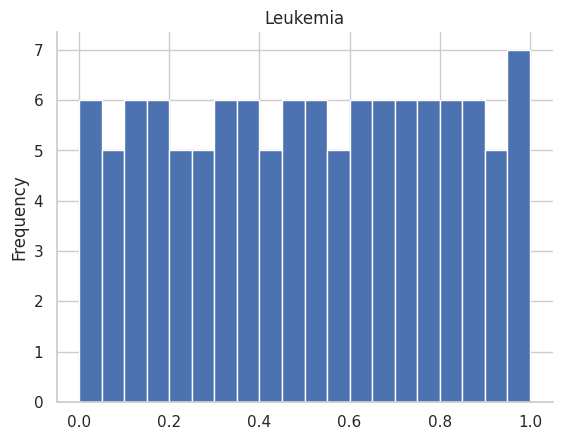

In [ ]:
from matplotlib import pyplot as plt
dfspl['Leukemia'].plot(kind='hist', bins=20, title='Leukemia')
plt.gca().spines[['top', 'right',]].set_visible(False)

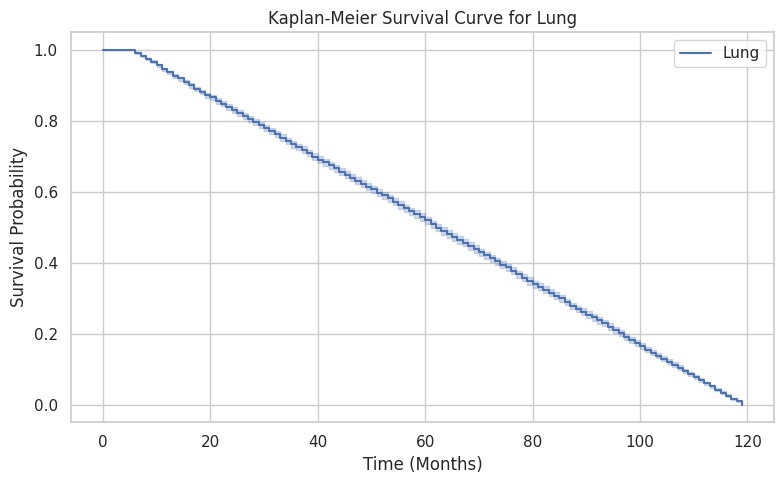

In [ ]:
cancer_type = "Lung"
subset = df[df['Cancer_Type'] == cancer_type].copy()
subset['Overall_Survival_Months'] = pd.to_numeric(subset['Overall_Survival_Months'], errors='coerce')
subset = subset.dropna(subset=['Overall_Survival_Months'])

kmflu = KaplanMeierFitter()
kmflu.fit(durations=subset['Overall_Survival_Months'], event_observed=[1] * len(subset), label=cancer_type)

plt.figure(figsize=(8, 5))
kmflu.plot_survival_function()
plt.title(f'Kaplan-Meier Survival Curve for {cancer_type}')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.tight_layout()

In [ ]:
dfsplul=pd.DataFrame(kmflu.survival_function_)
dfsplul

Lung
timeline          
0.0       1.000000
6.0       0.991463
7.0       0.983487
8.0       0.974500
9.0       0.967198
...            ...
115.0     0.033363
116.0     0.025163
117.0     0.015502
118.0     0.008650
119.0     0.000000

[115 rows x 1 columns]

from matplotlib import pyplot as plt
dfsplul['Lung'].plot(kind='hist', bins=20, title='Lung')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dfsplul['Lung'].plot(kind='line', figsize=(8, 4), title='Lung')
plt.gca().spines[['top', 'right']].set_visible(False)

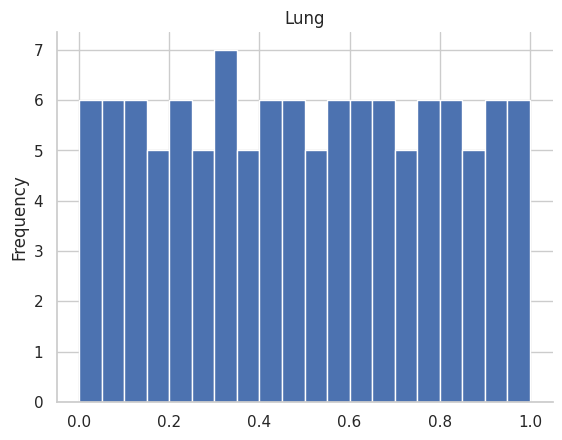

In [ ]:
from matplotlib import pyplot as plt
dfsplul['Lung'].plot(kind='hist', bins=20, title='Lung')
plt.gca().spines[['top', 'right',]].set_visible(False)

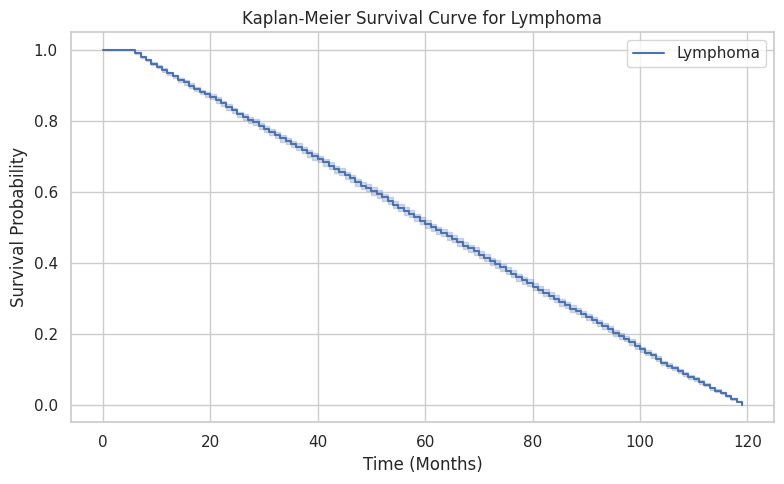

In [ ]:
cancer_type = "Lymphoma"
subset = df[df['Cancer_Type'] == cancer_type].copy()
subset['Overall_Survival_Months'] = pd.to_numeric(subset['Overall_Survival_Months'], errors='coerce')
subset = subset.dropna(subset=['Overall_Survival_Months'])
kmfly = KaplanMeierFitter()
kmfly.fit(durations=subset['Overall_Survival_Months'], event_observed=[1] * len(subset), label=cancer_type)
plt.figure(figsize=(8, 5))
kmfly.plot_survival_function()
plt.title(f'Kaplan-Meier Survival Curve for {cancer_type}')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.tight_layout()

In [ ]:
dfsply=pd.DataFrame(kmfly.survival_function_)
dfsply

Lymphoma
timeline          
0.0       1.000000
6.0       0.991850
7.0       0.981244
8.0       0.971419
9.0       0.961594
...            ...
115.0     0.032712
116.0     0.024785
117.0     0.016523
118.0     0.007592
119.0     0.000000

[115 rows x 1 columns]

from matplotlib import pyplot as plt
dfsply['Lymphoma'].plot(kind='hist', bins=20, title='Lymphoma')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dfsply['Lymphoma'].plot(kind='line', figsize=(8, 4), title='Lymphoma')
plt.gca().spines[['top', 'right']].set_visible(False)

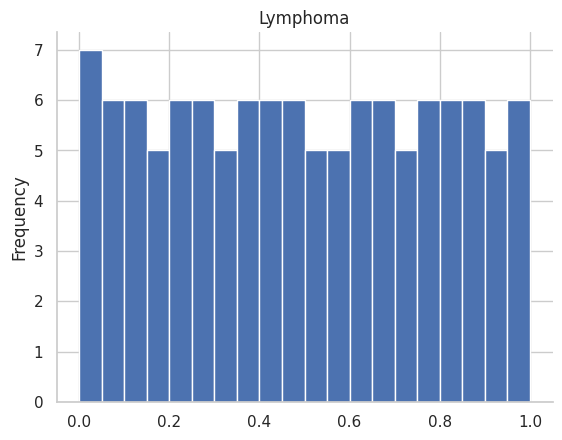

In [ ]:
from matplotlib import pyplot as plt
dfsply['Lymphoma'].plot(kind='hist', bins=20, title='Lymphoma')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Predictive** **Analysis**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

<ipython-input-17-b3a3ff52cb10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-17-b3a3ff52cb10>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-17-b3a3ff52cb10>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_trans

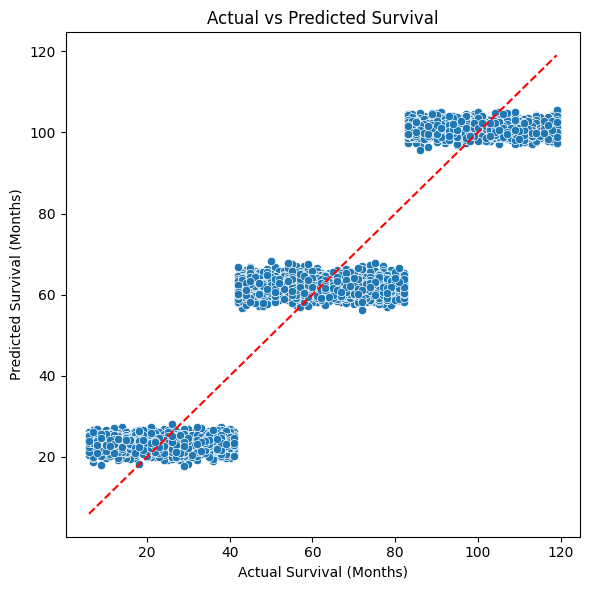

R² Score: 0.8865
Mean Absolute Error (MAE): 9.5928
Root Mean Squared Error (RMSE): 11.1299


In [ ]:
df.dropna(inplace=True)
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

tes_category_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['TES Category'] = df['TES Category'].map(tes_category_mapping)

X = df.drop(columns=['Overall_Survival_Months','Treatment Effectiveness Score (TES)'])
y = df['Overall_Survival_Months']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Survival (Months)")
plt.ylabel("Predicted Survival (Months)")
plt.title("Actual vs Predicted Survival")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

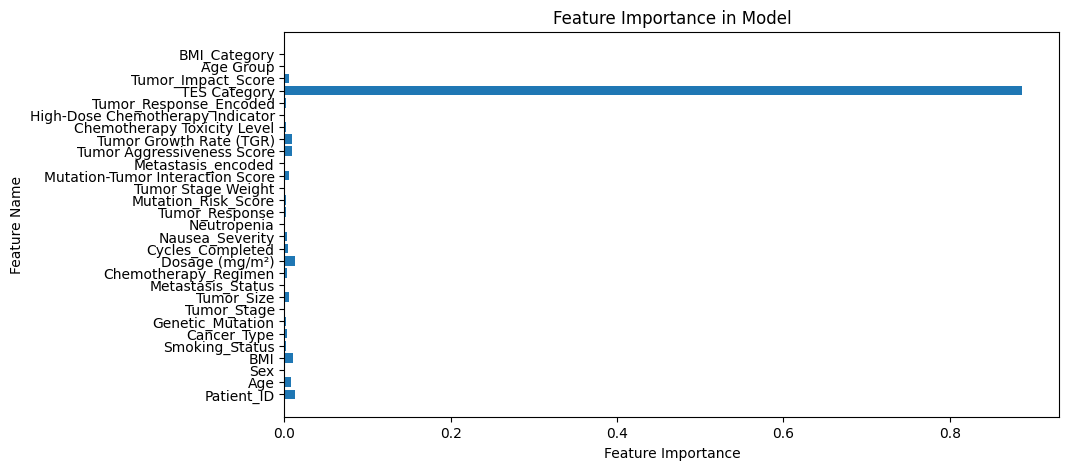

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 5))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Model")
plt.show()
